<a href="https://colab.research.google.com/github/Adetowobola/Logistics-and-supply-chain-optimization/blob/main/Capstone4_SwiftLChainlogistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optimizing Logistics and Supply chain Data for SwiftChain Analytics

#Objectives

Data Understanding and Exploration: Analyze the dataset to identify trends and outliers in logistics data.

Data Preprocessing: Clean and prepare data, addressing issues such as missing values and inconsistent formats.

Feature Engineering: Create and select relevant features to improve model performance.

Model Development: Build, evaluate, and fine-tune classification models to predict delivery delays.

Insights and Recommendations: Provide actionable recommendations for reducing delivery delays.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Loading and Understanding Data Structures

In [ ]:
#Loading the data
SwiftChain_Data = pd.read_csv("/content/drive/MyDrive/SwiftChain/logistics.csv")
feat_definition = pd.read_csv("/content/drive/MyDrive/SwiftChain/feature_description.csv")

In [ ]:
#viewing the first five rows
SwiftChain_Data.head()

payment_type  profit_per_order  sales_per_customer  category_id  \
0        DEBIT         34.448338            92.49099          9.0   
1     TRANSFER         91.193540           181.99008         48.0   
2        DEBIT          8.313806            89.96643         46.0   
3     TRANSFER        -89.463196            99.15065         17.0   
4        DEBIT         44.722590           170.97824         48.0   

          category_name customer_city customer_country  customer_id  \
0      Cardio Equipment        Caguas      Puerto Rico   12097.6830   
1          Water Sports   Albuquerque          EE. UU.    5108.1045   
2  Indoor/Outdoor Games      Amarillo      Puerto Rico    4293.4478   
3                Cleats        Caguas      Puerto Rico     546.5306   
4          Water Sports       Peabody          EE. UU.    1546.3980   

  customer_segment customer_state  ...     order_region  \
0         Consumer             PR  ...   Western Europe   
1         Consumer             CA  ...    South America   
2         Consumer             PR  ...   Western Europe   
3         Consumer             PR  ...  Central America   
4         Consumer             CA  ...  Central America   

                  order_state order_status  product_card_id  \
0                      Vienna     COMPLETE            191.0   
1                Buenos Aires      PENDING           1073.0   
2  Nord-Pas-de-Calais-Picardy     COMPLETE           1014.0   
3                   Santa Ana   PROCESSING            365.0   
4                    Illinois     COMPLETE           1073.0   

   product_category_id                       product_name product_price  \
0                  9.0  Nike Men's Free 5.0+ Running Shoe         99.99   
1                 48.0        Pelican Sunstream 100 Kayak        199.99   
2                 46.0   O'Brien Men's Neoprene Life Vest         49.98   
3                 17.0   Perfect Fitness Perfect Rip Deck         59.99   
4                 48.0        Pelican Sunstream 100 Kayak        199.99   

               shipping_date   shipping_mode label  
0  2015-08-13 00:00:00+01:00  Standard Class    -1  
1  2017-04-09 00:00:00+01:00  Standard Class    -1  
2  2015-03-18 00:00:00+00:00    Second Class     1  
3  2017-03-18 00:00:00+00:00    Second Class     0  
4  2015-03-30 00:00:00+01:00  Standard Class     1  

[5 rows x 41 columns]

In [ ]:
#Last Five rows of data
SwiftChain_Data.tail()

payment_type  profit_per_order  sales_per_customer  category_id  \
15544        DEBIT        108.042500          359.980000         45.0   
15545        DEBIT         22.480274          169.990000         46.0   
15546      PAYMENT         15.861091           47.497177         35.0   
15547     TRANSFER        -23.254063           49.973537         17.0   
15548     TRANSFER        177.790680          387.973020          9.0   

              category_name customer_city customer_country  customer_id  \
15544               Fishing        Caguas      Puerto Rico    8333.1170   
15545  Indoor/Outdoor Games        Caguas      Puerto Rico    3182.7766   
15546           Electronics       Del Rio          EE. UU.    9697.5720   
15547                Cleats        Caguas      Puerto Rico    1953.6525   
15548      Cardio Equipment        Caguas      Puerto Rico    6012.8926   

      customer_segment customer_state  ...     order_region  \
15544         Consumer             PR  ...  Central America   
15545         Consumer             PR  ...    South America   
15546         Consumer             TX  ...   Western Europe   
15547         Consumer             PR  ...   Southeast Asia   
15548         Consumer             PR  ...    South America   

                  order_state     order_status  product_card_id  \
15544                 Managua         COMPLETE        1004.0000   
15545                 Yucatan         COMPLETE        1014.0000   
15546  North Rhine-Westphalia  PENDING_PAYMENT         823.7916   
15547               West Java          PENDING         365.0000   
15548                Tarapaca       PROCESSING         191.0000   

       product_category_id                                   product_name  \
15544                 45.0      Field & Stream Sportsman 16 Gun Fire Safe   
15545                 46.0               O'Brien Men's Neoprene Life Vest   
15546                 35.0  Bridgestone e6 Straight Distance NFL Carolina   
15547                 17.0               Perfect Fitness Perfect Rip Deck   
15548                  9.0              Nike Men's Free 5.0+ Running Shoe   

      product_price              shipping_date   shipping_mode label  
15544        399.98  2017-04-03 00:00:00+01:00  Standard Class     1  
15545         49.98  2017-06-05 00:00:00+01:00  Standard Class    -1  
15546         30.00  2015-05-04 00:00:00+01:00  Standard Class     0  
15547         59.99  2016-04-07 00:00:00+01:00  Standard Class     1  
15548         99.99  2017-09-15 00:00:00+01:00    Second Class     1  

[5 rows x 41 columns]

In [ ]:
#viewing variables and the definitions
feat_definition

variable_name         type  \
0               payment_type  categorical   
1           profit_per_order    numerical   
2         sales_per_customer    numerical   
3                category_id    numerical   
4              category_name         text   
5              customer_city  categorical   
6           customer_country  categorical   
7                customer_id    numerical   
8           customer_segment  categorical   
9             customer_state  categorical   
10          customer_zipcode         text   
11             department_id    numerical   
12           department_name         text   
13                  latitude    numerical   
14                 longitude    numerical   
15                    market  categorical   
16                order_city  categorical   
17             order_country  categorical   
18         order_customer_id    numerical   
19                order_date     datetime   
20                  order_id    numerical   
21    order_item_cardprod_id    numerical   
22       order_item_discount    numerical   
23  order_item_discount_rate    numerical   
24             order_item_id    numerical   
25  order_item_product_price    numerical   
26   order_item_profit_ratio    numerical   
27       order_item_quantity    numerical   
28                     sales    numerical   
29   order_item_total_amount    numerical   
30    order_profit_per_order    numerical   
31              order_region  categorical   
32               order_state  categorical   
33              order_status  categorical   
34           product_card_id    numerical   
35       product_category_id    numerical   
36              product_name         text   
37             product_price    numerical   
38             shipping_date     datetime   
39             shipping_mode  categorical   
40                     label  categorical   

                                          description  
0                            Type of transaction made  
1                           Earnings per order placed  
2          Total sales per customer made per customer  
3                               Product category code  
4                 Description of the product category  
5           City where the customer made the purchase  
6        Country where the customer made the purchase  
7                                         Customer ID  
8   Types of Customers Consumer, Corporate, Home O...  
9   State to which the store where the purchase is...  
10                                   Customer Zipcode  
11                           Department code of store  
12                           Department name of store  
13        Latitude corresponding to location of store  
14       Longitude corresponding to location of store  
15  Market to where the order is delivered: Africa...  
16                      Destination city of the order  
17                   Destination country of the order  
18                                Customer order code  
19                    Date on which the order is made  
20                                         Order code  
21     Product code generated through the RFID reader  
22                          Order item discount value  
23                     Order item discount percentage  
24                                    Order item code  
25                 Price of products without discount  
26                            Order Item Profit Ratio  
27                       Number of products per order  
28                                     Value in sales  
29                             Total amount per order  
30                             Order Profit Per Order  
31  Region of the world where the order is deliver...  
32   State of the region where the order is delivered  
33  Order Status: COMPLETE, PENDING, CLOSED, PENDI...  
34                                       Product code  
35                              Product category code  
36                                       Product nam

In [ ]:
#viewing the data types and structure of data
SwiftChain_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [ ]:
#viewing number of rows and columns
print("The number of rows and columns: ",SwiftChain_Data.shape)

The number of rows and columns:  (15549, 41)


#Data Cleaning

In [ ]:
#verifying missing values
SwiftChain_Data.isnull().sum()

payment_type                0
profit_per_order            0
sales_per_customer          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
customer_zipcode            0
department_id               0
department_name             0
latitude                    0
longitude                   0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
order_region                0
order_state                 0
order_status                0
product_card_id             0
product_category_id         0
product_name                0
product_price               0
shipping_date               0
shipping_mode               0
label                       0
dtype: int64

There are no missing values in the data

In [ ]:
#verifying Duplicates
SwiftChain_Data.duplicated().sum()

np.int64(0)

There are no duplicates in the data

removing white spaces

In [ ]:
#removing spaces
SwiftChain_Data.columns = SwiftChain_Data.columns.str.strip()
SwiftChain_Data.columns

Index(['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total_amount', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date', 'shipping_mode',
       'label'],
      dtype='object')

In [ ]:
SwiftChain_Data.describe()

profit_per_order  sales_per_customer   category_id   customer_id  \
count      15549.000000        15549.000000  15549.000000  15549.000000   
mean          22.604542          179.888256     31.461342   6583.279789   
std           99.265198          113.727323     15.303616   4114.273782   
min        -3442.500000            8.351162      2.000000      1.000000   
25%            7.562795          104.397330     18.000000   3119.983200   
50%           31.693370          165.944170     29.000000   6429.229000   
75%           63.872166          242.440930     45.000000   9642.381000   
max          911.800000         1939.990000     76.000000  20757.000000   

       customer_zipcode  department_id      latitude     longitude  \
count      15549.000000   15549.000000  15549.000000  15549.000000   
mean       35458.234968       5.413462     29.677619    -84.512318   
std        37343.702033       1.581550      9.877876     20.681015   
min          603.000000       2.000000    -33.937553   -158.025990   
25%          725.000000       4.000000     18.263327    -98.088170   
50%        19145.775000       5.000000     33.435677    -76.580800   
75%        77502.820000       7.000000     39.277313    -66.370575   
max        99205.000000      12.000000     48.781933    115.263080   

       order_customer_id      order_id  ...  order_item_product_price  \
count       15549.000000  15549.000000  ...              15549.000000   
mean         6586.810354  35718.970019  ...                137.005272   
std          4101.324290  21071.742668  ...                134.545269   
min             1.000000      1.000000  ...                  9.990000   
25%          3177.568800  16530.752000  ...                 50.000000   
50%          6308.530000  35391.336000  ...                 59.990000   
75%          9703.070000  55236.910000  ...                199.990000   
max         20757.000000  77204.000000  ...               1999.990000   

       order_item_profit_ratio  order_item_quantity         sales  \
count             15549.000000         15549.000000  15549.000000   
mean                  0.120391             2.165202    200.562289   
std                   0.474088             1.468627    125.984986   
min                  -2.750000             1.000000      9.990000   
25%                   0.080000             1.000000    119.980000   
50%                   0.270000             1.000000    199.920000   
75%                   0.360000             3.000000    299.950000   
max                   0.500000             5.000000   1999.990000   

       order_item_total_amount  order_profit_per_order  product_card_id  \
count             15549.000000            15549.000000     15549.000000   
mean                179.780850               22.273342       685.213286   
std                 110.999735              117.503163       330.778230   
min                   7.490000            -3442.500000        19.000000   
25%                 105.570910                7.443977       403.000000   
50%                 165.990000               32.440100       627.000000   
75%                 242.436400               64.303566      1004.000000   
max                1939.990000              911.800000      1363.000000   

       product_category_id  product_price         label  
count         15549.000000   15549.000000  15549.000000  
mean             31.387606     136.629368      0.349283  
std              15.256620     133.366285      0.826623  
min               2.000000       9.990000     -1.000000  
25%              18.000000      50.000000      0.000000  
50%              29.000000      59.990000      1.000000  
75%              45.000000     199.990000      1.000000  
max              76.000000    1999.990000      1.000000  

[8 rows x 24 columns]

standardizing inconsistent date formats

In [ ]:
#formatting date object to datetime and bringing them all to same timezones for fair analysis
SwiftChain_Data["order_date"] = pd.to_datetime(SwiftChain_Data["order_date"], utc=True)
SwiftChain_Data["shipping_date"] = pd.to_datetime(SwiftChain_Data["shipping_date"], utc=True)

In [ ]:
#creating new columns to normalize timezone
SwiftChain_Data["order_date_norm"] = SwiftChain_Data["order_date"].dt.normalize().dt.tz_localize(None)
SwiftChain_Data["shipping_date_norm"] = SwiftChain_Data["shipping_date"].dt.normalize().dt.tz_localize(None)

creating delivery delays column

In [ ]:
delay_map = {-1: "late delivery", 0: "on-time delivery", 1: "early delivery"}
SwiftChain_Data["delivery_delay_status"] = SwiftChain_Data["label"].map(delay_map)

In [ ]:
#verifying info
SwiftChain_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   payment_type              15549 non-null  object             
 1   profit_per_order          15549 non-null  float64            
 2   sales_per_customer        15549 non-null  float64            
 3   category_id               15549 non-null  float64            
 4   category_name             15549 non-null  object             
 5   customer_city             15549 non-null  object             
 6   customer_country          15549 non-null  object             
 7   customer_id               15549 non-null  float64            
 8   customer_segment          15549 non-null  object             
 9   customer_state            15549 non-null  object             
 10  customer_zipcode          15549 non-null  float64            
 11  department_id  

In [ ]:
#customer_state with wrong value viewed
SwiftChain_Data.loc[SwiftChain_Data["customer_state"]== '91732']

payment_type  profit_per_order  sales_per_customer  category_id  \
473      PAYMENT          81.83128              290.98         43.0   

        category_name customer_city customer_country  customer_id  \
473  Camping & Hiking        Joliet          EE. UU.    7957.3286   

    customer_segment customer_state  ...  product_card_id  \
473      Home Office          91732  ...            957.0   

     product_category_id                                   product_name  \
473                 43.0  Diamondback Women's Serene Classic Comfort Bi   

     product_price             shipping_date shipping_mode label  \
473         299.98 2015-08-14 23:00:00+00:00   First Class     1   

    order_date_norm  shipping_date_norm delivery_delay_status  
473      2015-08-06          2015-08-14        early delivery  

[1 rows x 44 columns]

In [ ]:
#dropping the original columns and wrong value column
SwiftChain = SwiftChain_Data.drop(index=473)
SwiftChain_new  = SwiftChain.drop(["order_date", "shipping_date", "label"], axis =1)

In [ ]:
SwiftChain_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15548 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_type              15548 non-null  object        
 1   profit_per_order          15548 non-null  float64       
 2   sales_per_customer        15548 non-null  float64       
 3   category_id               15548 non-null  float64       
 4   category_name             15548 non-null  object        
 5   customer_city             15548 non-null  object        
 6   customer_country          15548 non-null  object        
 7   customer_id               15548 non-null  float64       
 8   customer_segment          15548 non-null  object        
 9   customer_state            15548 non-null  object        
 10  customer_zipcode          15548 non-null  float64       
 11  department_id             15548 non-null  float64       
 12  department_name        

#Exploratory Data Analysis

separating data into categorical and numerical values

In [ ]:
num_col = SwiftChain_new.select_dtypes(include=["number"])

cat_col = SwiftChain_new.select_dtypes(include=["object"])

Non visual analysis of categorical data

In [ ]:
for col in cat_col:
  print("-"*10, col, "-"*10)
  print(cat_col[col].agg(["count", "nunique",  "unique"]))
  print("\nValue counts: \n", cat_col[col].value_counts())
  print("\n")

---------- payment_type ----------
count                                 15548
nunique                                   4
unique     [DEBIT, TRANSFER, CASH, PAYMENT]
Name: payment_type, dtype: object

Value counts: 
 payment_type
DEBIT       6148
PAYMENT     3848
TRANSFER    3796
CASH        1756
Name: count, dtype: int64


---------- category_name ----------
count                                                  15548
nunique                                                   49
unique     [Cardio Equipment, Water Sports, Indoor/Outdoo...
Name: category_name, dtype: object

Value counts: 
 category_name
Cleats                  2212
Men's Footwear          1931
Women's Apparel         1906
Indoor/Outdoor Games    1657
Fishing                 1426
Water Sports            1391
Camping & Hiking        1126
Shop By Sport           1056
Cardio Equipment        1049
Electronics              219
Accessories              123
Golf Balls               120
Golf Gloves              101
Girls' Appa

In [ ]:
#replacing values
SwiftChain_new["order_status"] = SwiftChain_new["order_status"].replace({"PENDING_PAYMENT": "PENDING"})

In [ ]:
SwiftChain_new["order_status"].value_counts()

order_status
PENDING           5632
COMPLETE          5290
PROCESSING        2046
CLOSED            1763
ON_HOLD            761
PAYMENT_REVIEW      56
Name: count, dtype: int64

Non Visual analysis of numeric data

In [ ]:
for col in num_col:
  print("-"*10, col, "-"*10)
  print(num_col[col].agg(["count", "nunique", "mean", "median", "std", "var", "min", "max", "skew", "kurt"]))
  print("\n")

---------- profit_per_order ----------
count      15548.000000
nunique    15454.000000
mean          22.600732
median        31.691431
std           99.267253
var         9853.987596
min        -3442.500000
max          911.800000
skew          -5.805122
kurt         124.255325
Name: profit_per_order, dtype: float64


---------- sales_per_customer ----------
count      15548.000000
nunique     8947.000000
mean         179.881110
median       165.944035
std          113.727490
var        12933.942069
min            8.351162
max         1939.990000
skew           2.718004
kurt          26.532624
Name: sales_per_customer, dtype: float64


---------- category_id ----------
count      15548.000000
nunique      469.000000
mean          31.460600
median        29.000000
std           15.303829
var          234.207171
min            2.000000
max           76.000000
skew           0.367611
kurt          -0.608906
Name: category_id, dtype: float64


---------- customer_id ----------
count      1

#Data Visualziation

visualization of categorical data

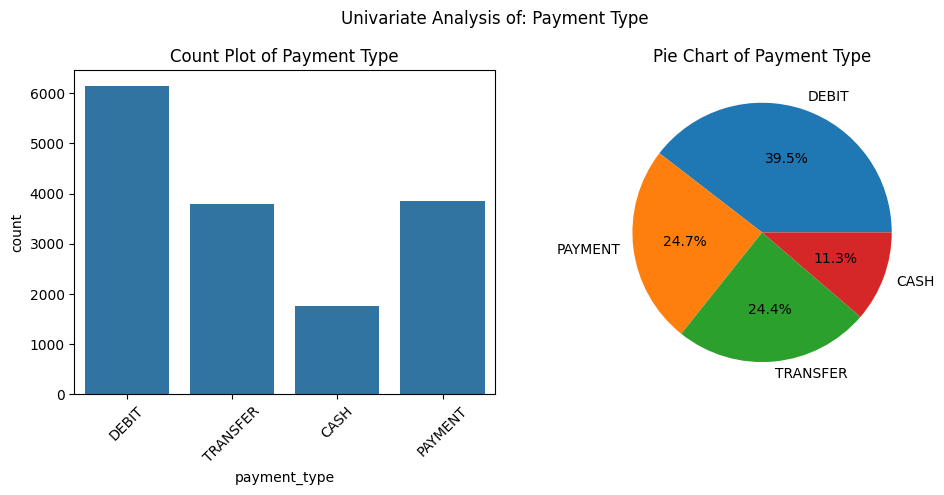

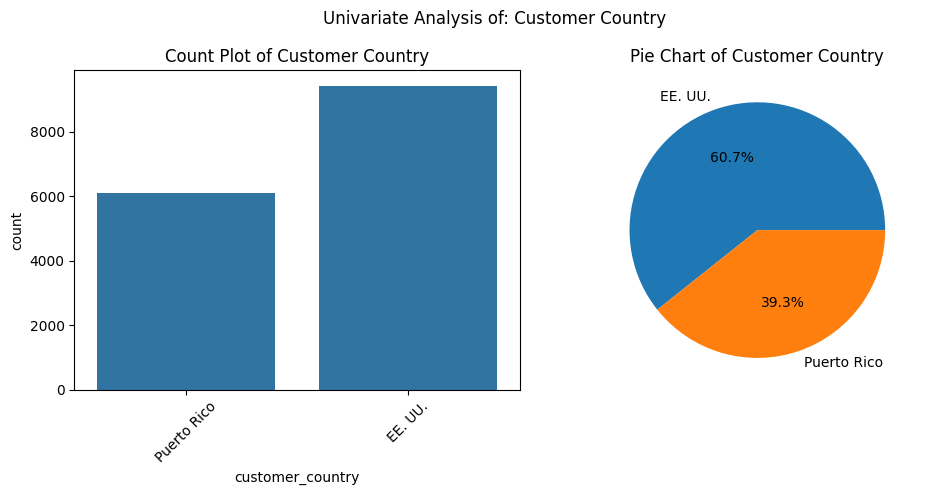

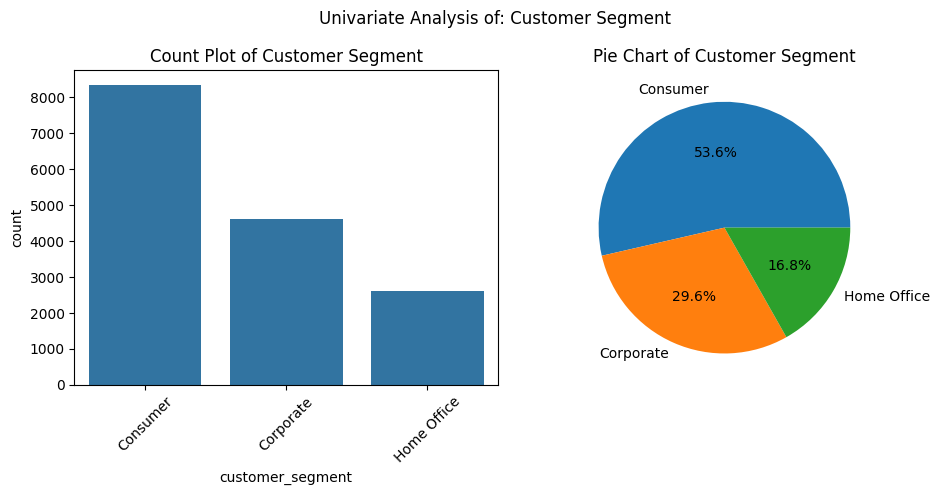

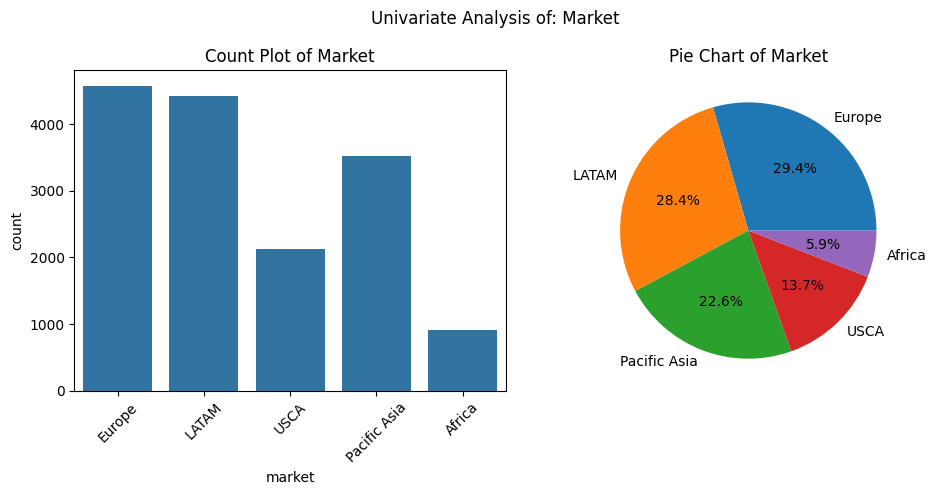

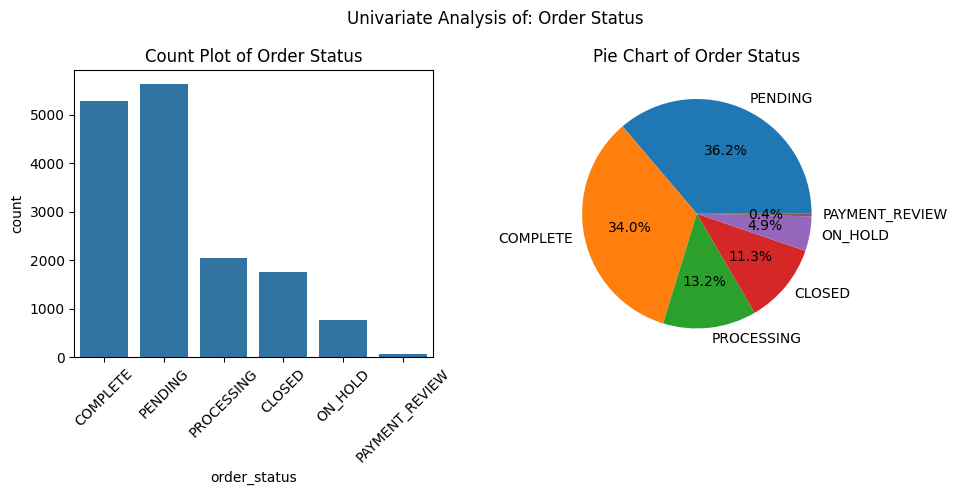

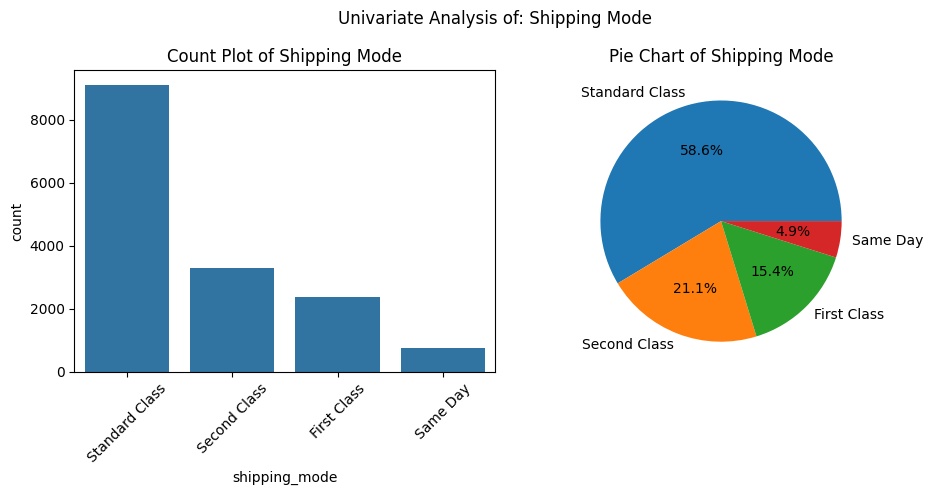

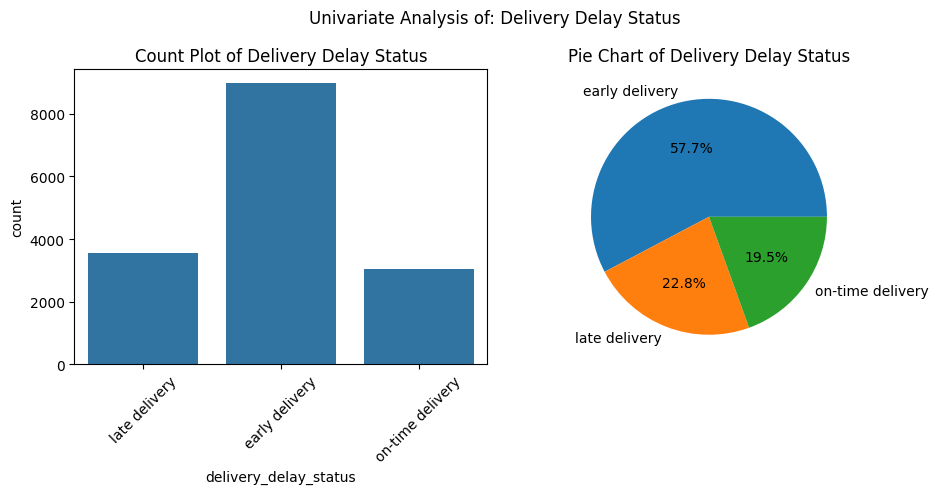

In [ ]:
columns_for_plots = ["payment_type", "customer_country", "customer_segment", "market", "order_status", "shipping_mode", "delivery_delay_status"]


for col in columns_for_plots:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Univariate Analysis of: {col.replace('_', ' ').title()}")

    # Countplot for selected categorical columns
    if col in columns_for_plots:
       sns.countplot(data=SwiftChain_new, x=col, ax=axs[0])
       axs[0].set_title(f"Count Plot of {col.replace('_', ' ').title()}")
       axs[0].tick_params(axis='x', rotation=45)

    # Pie chart for selected categorical columns
    if col in columns_for_plots:
        col_count = SwiftChain_new[col].value_counts()
        axs[1].pie(col_count, labels=col_count.index, autopct="%2.1f%%")
        axs[1].set_title(f"Pie Chart of {col.replace('_', ' ').title()}")


    plt.tight_layout()
    plt.show()

visualization of numeric data

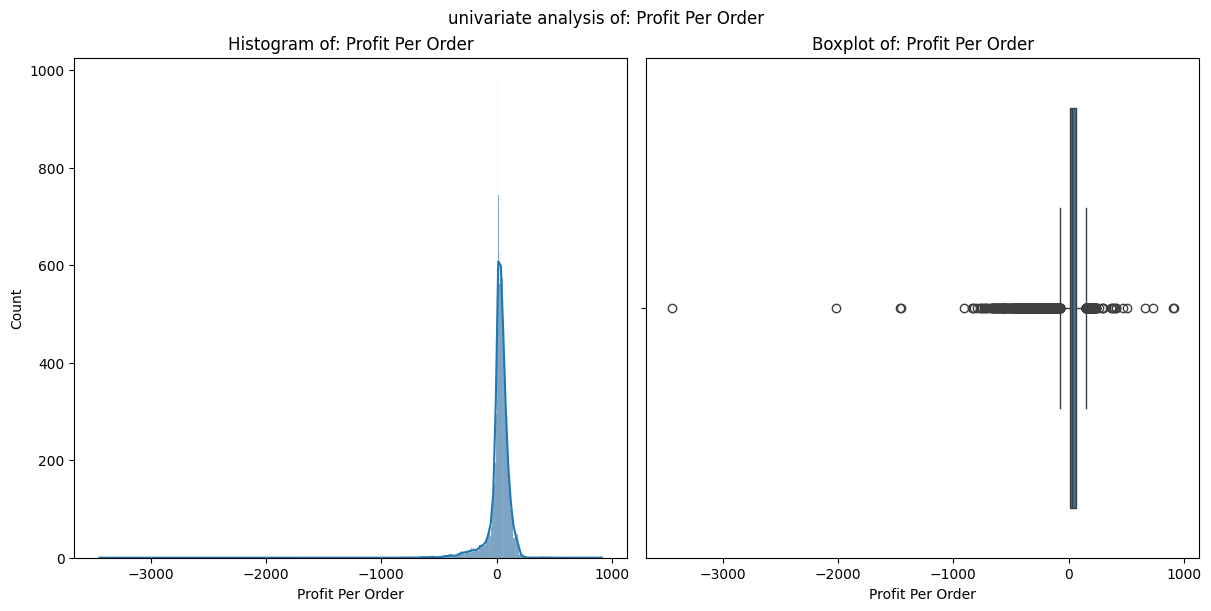

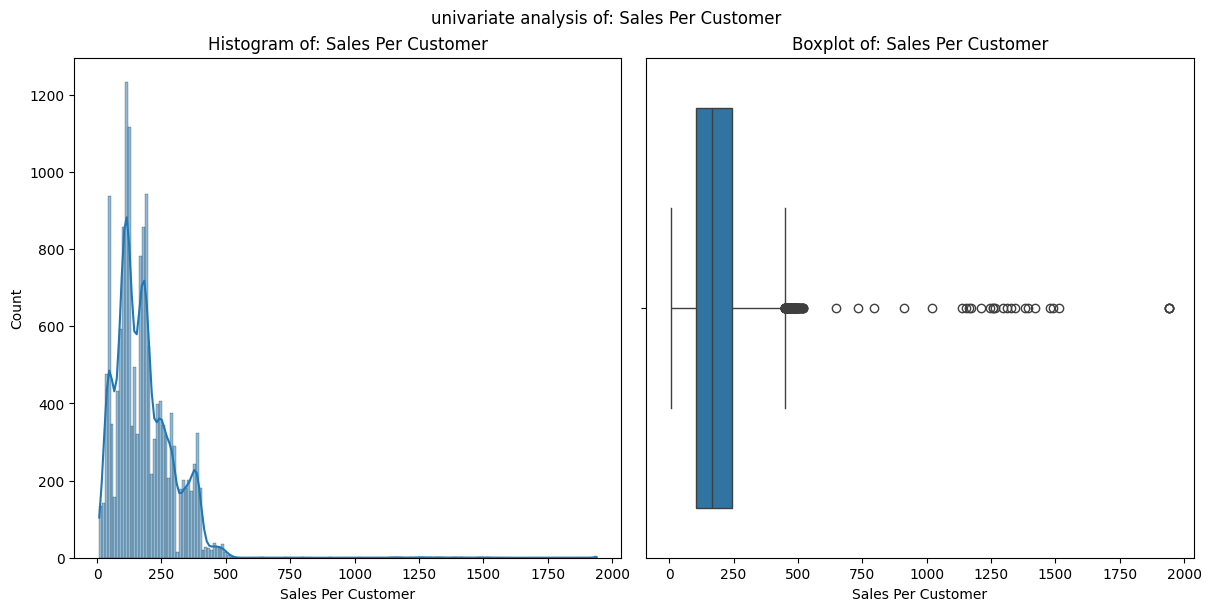

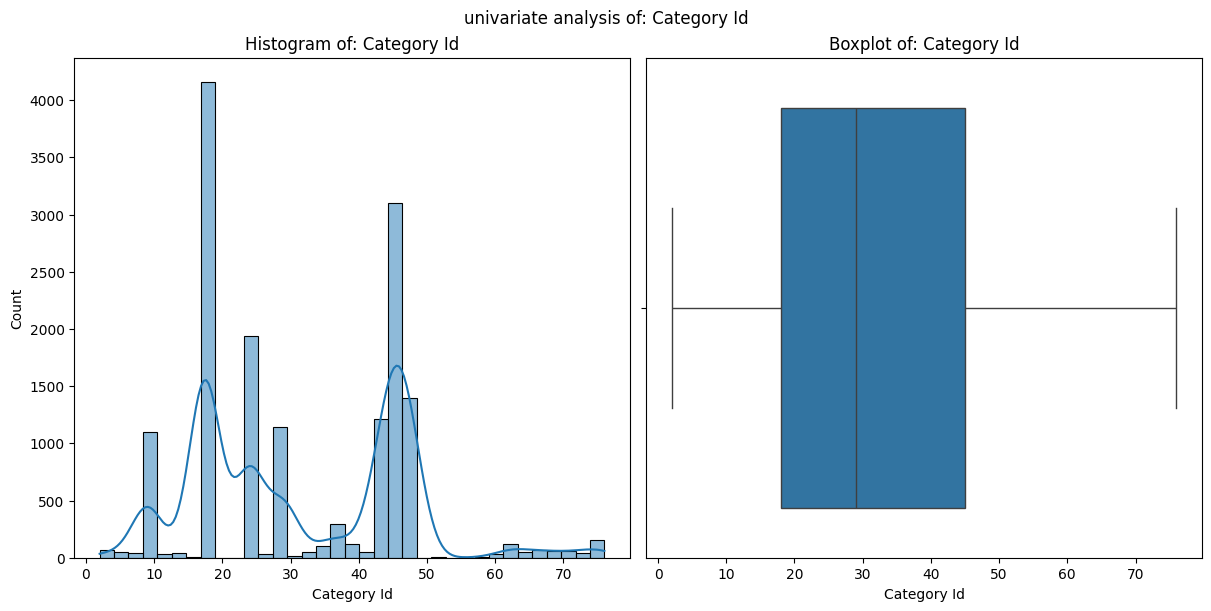

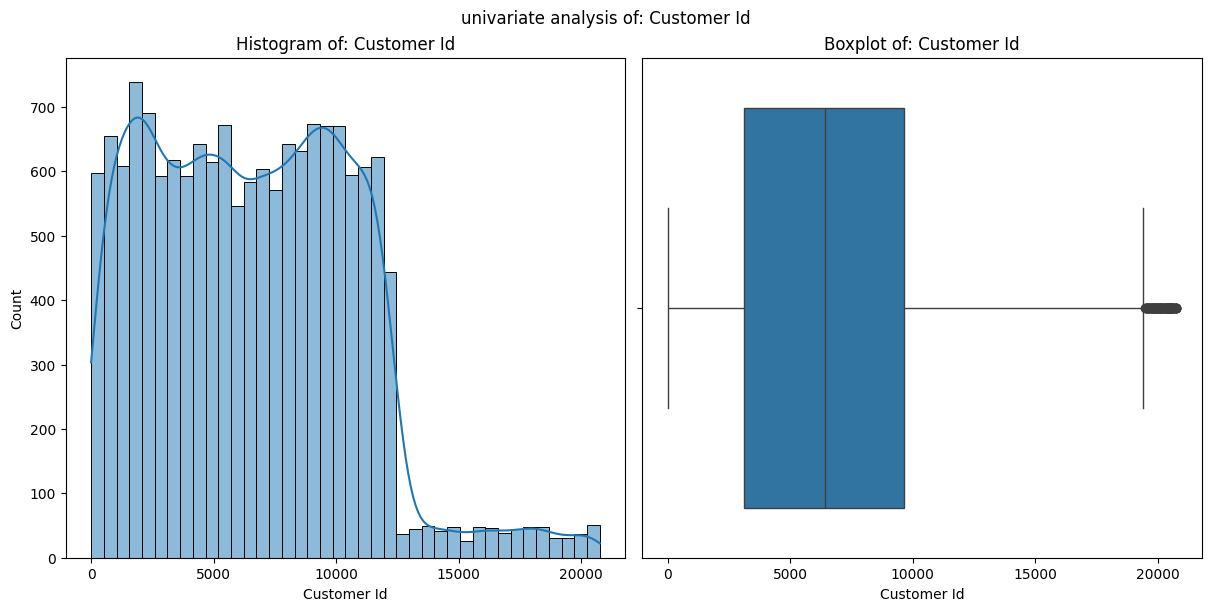

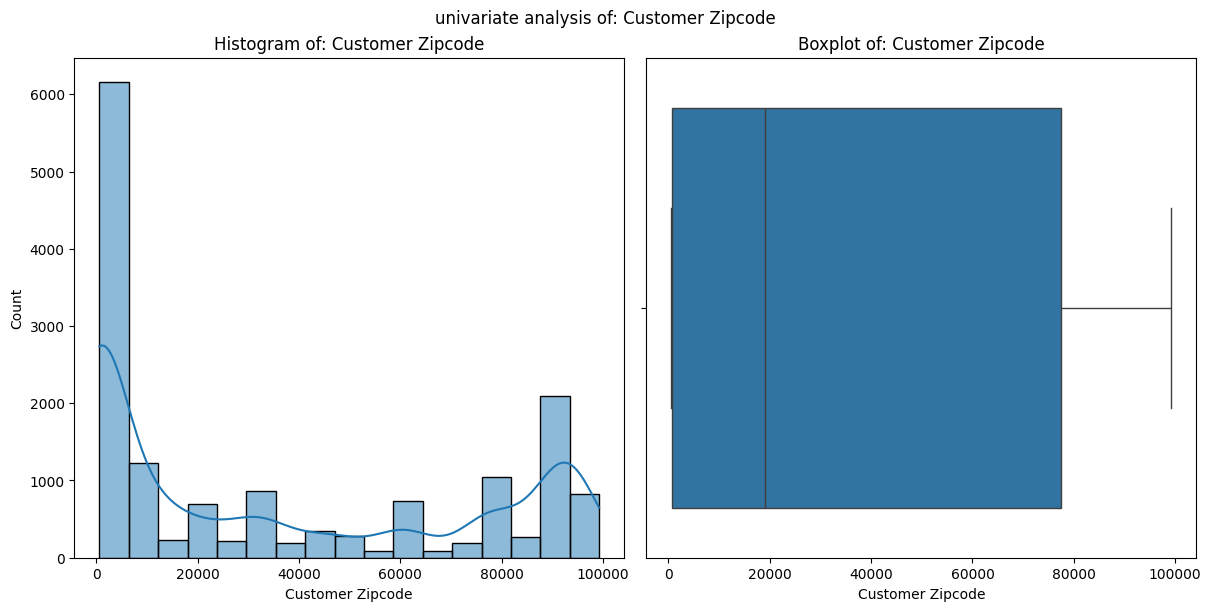

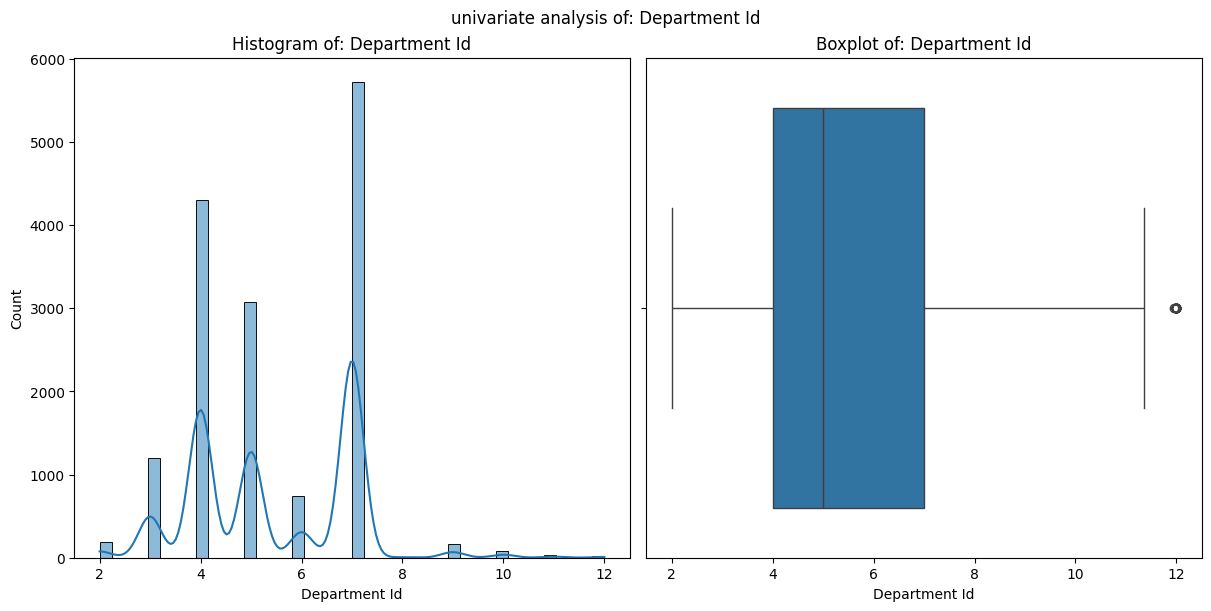

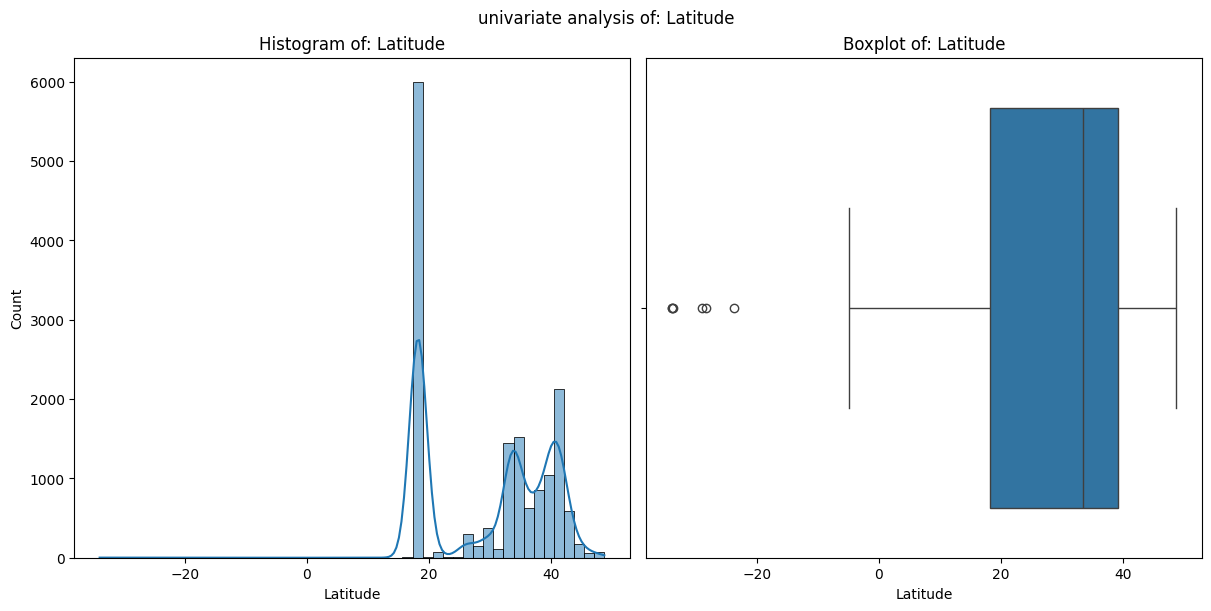

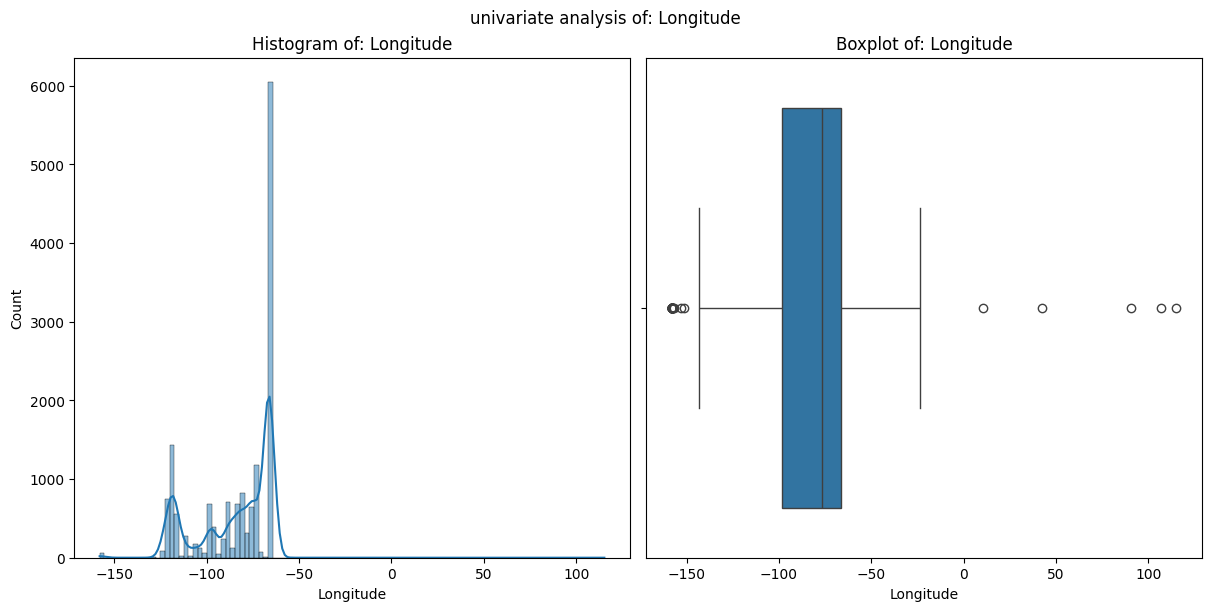

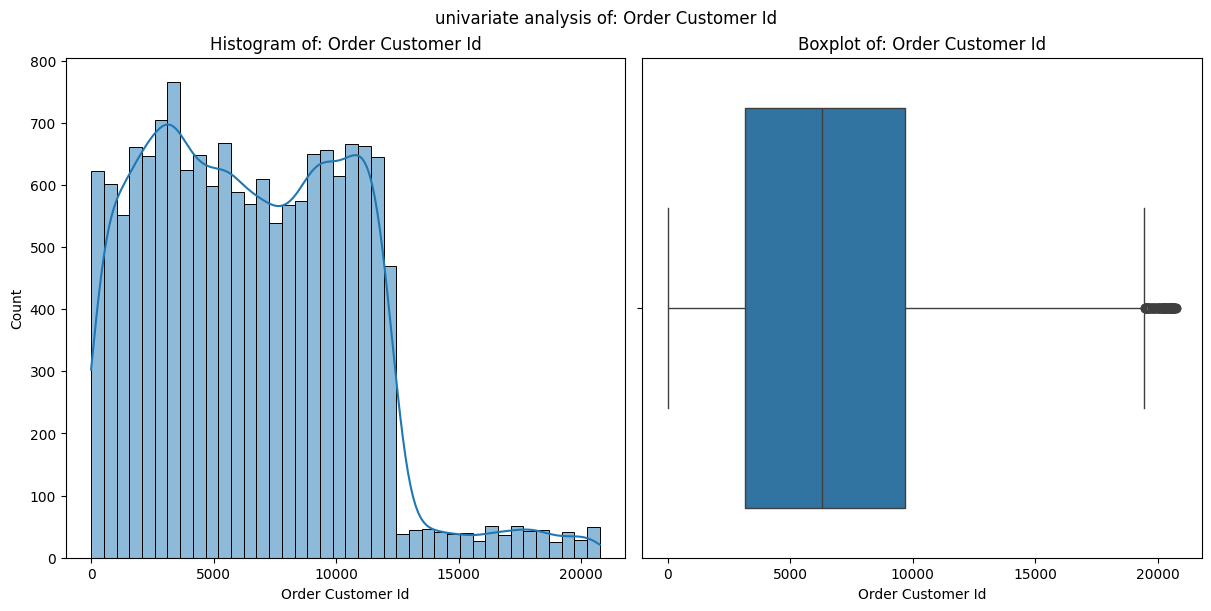

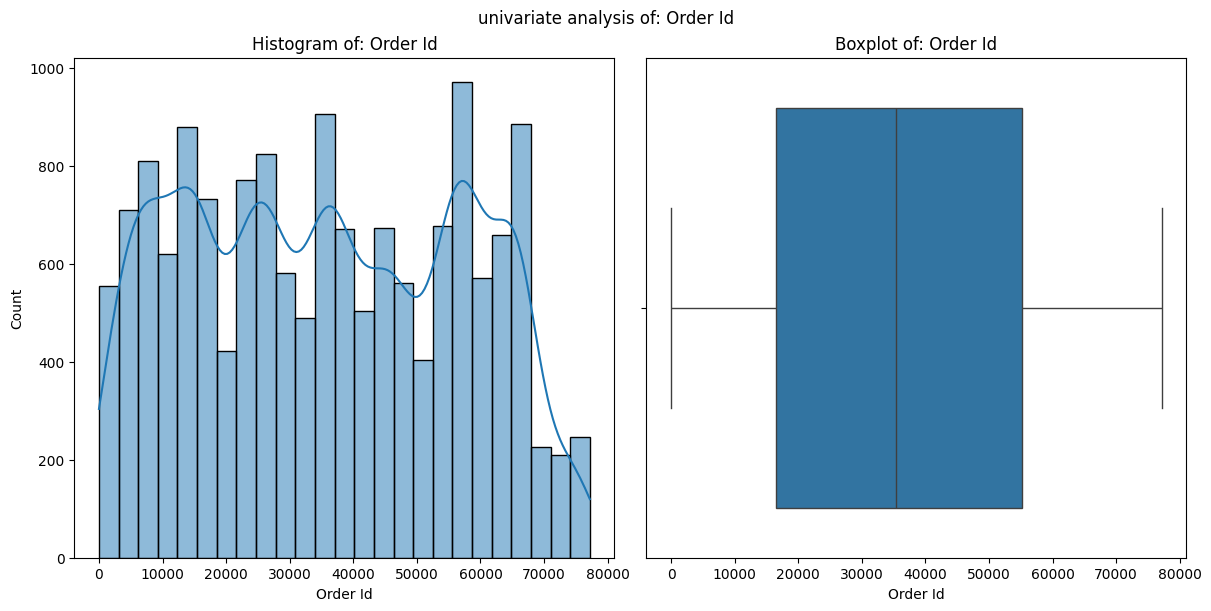

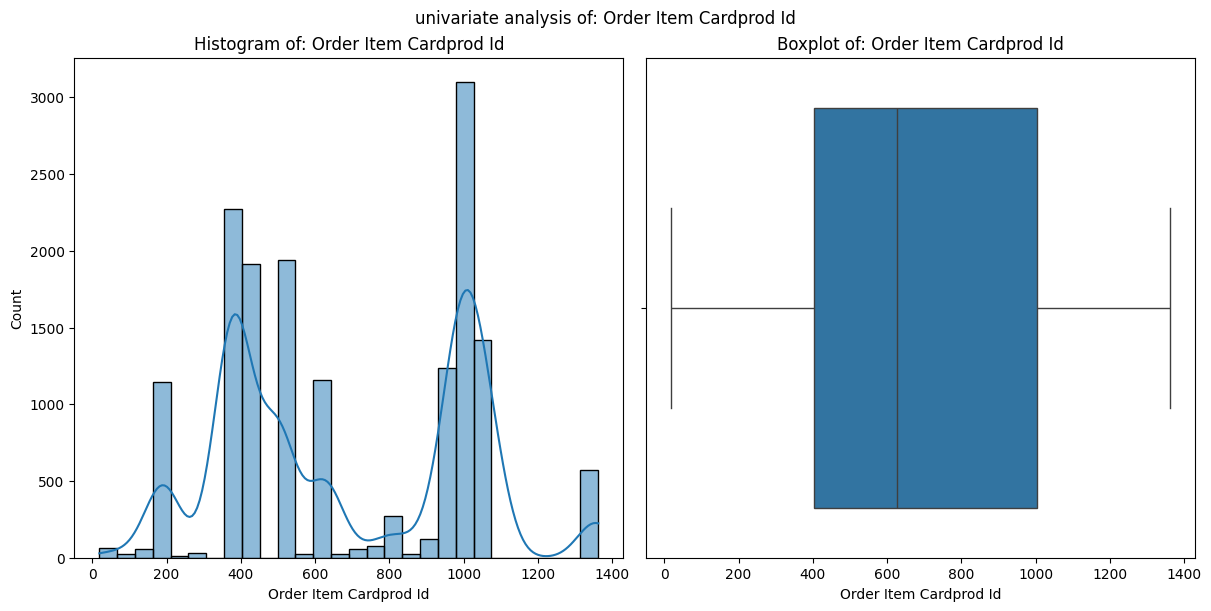

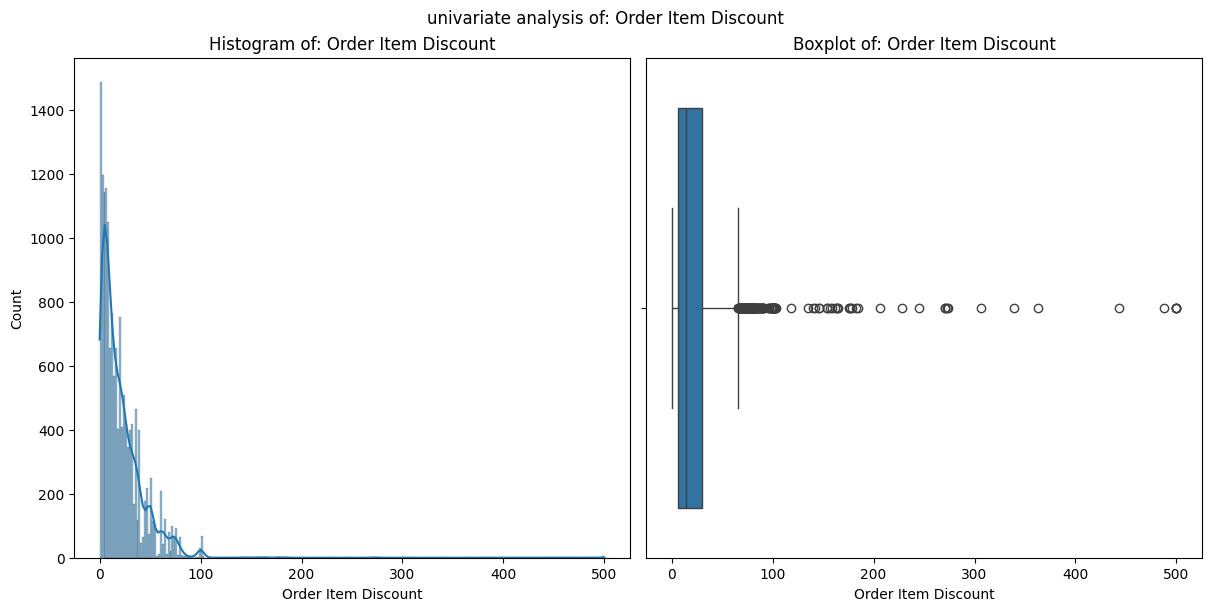

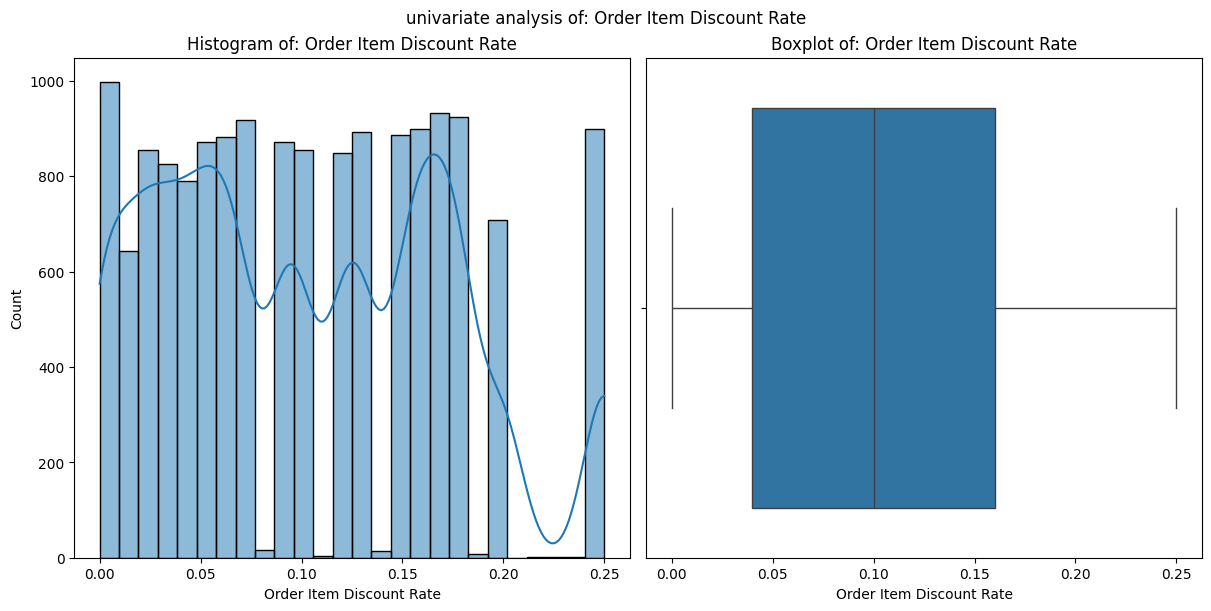

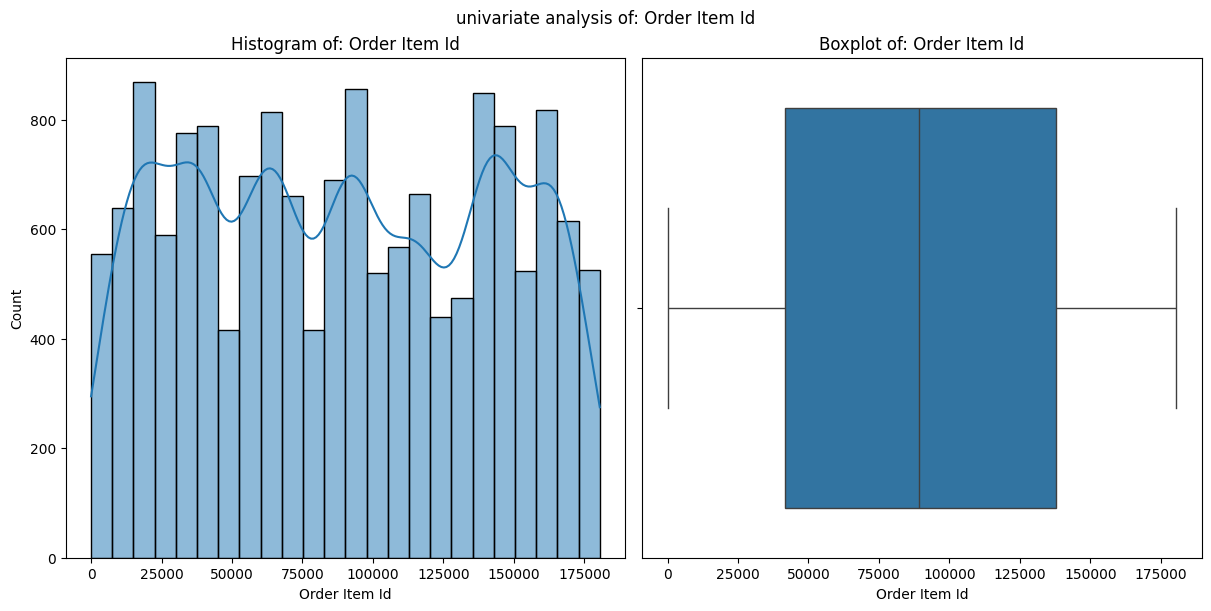

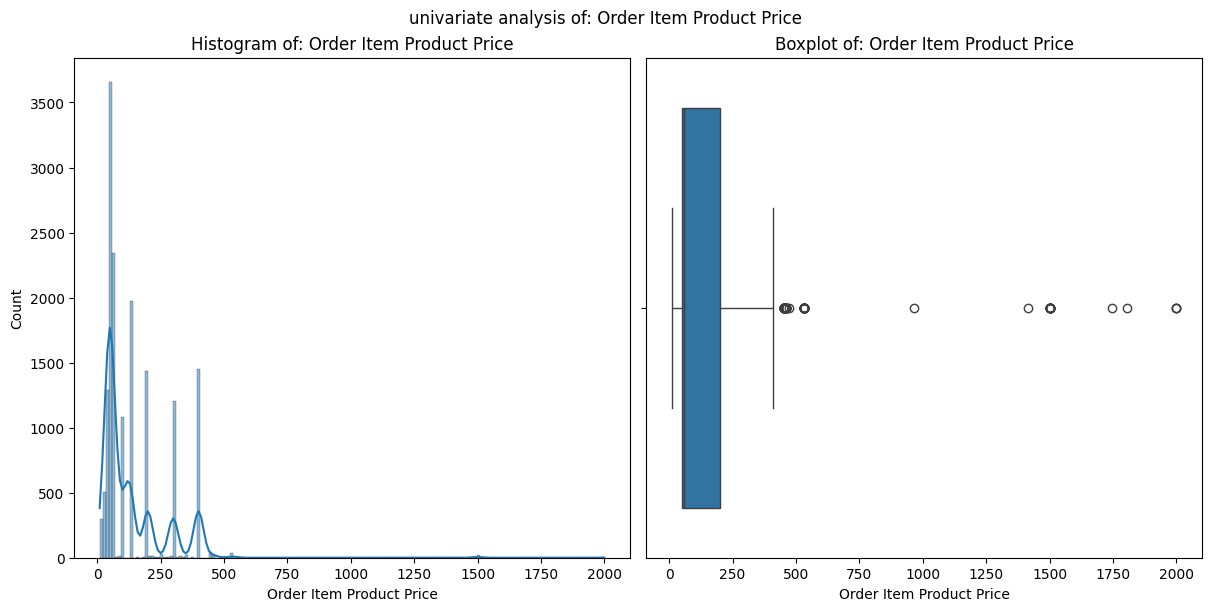

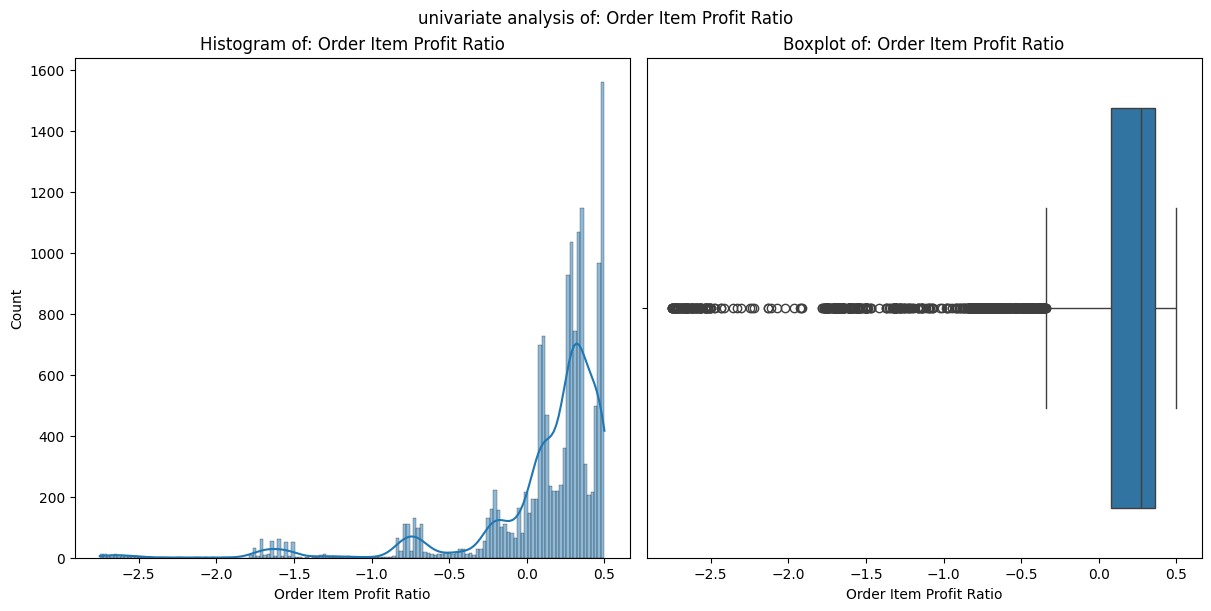

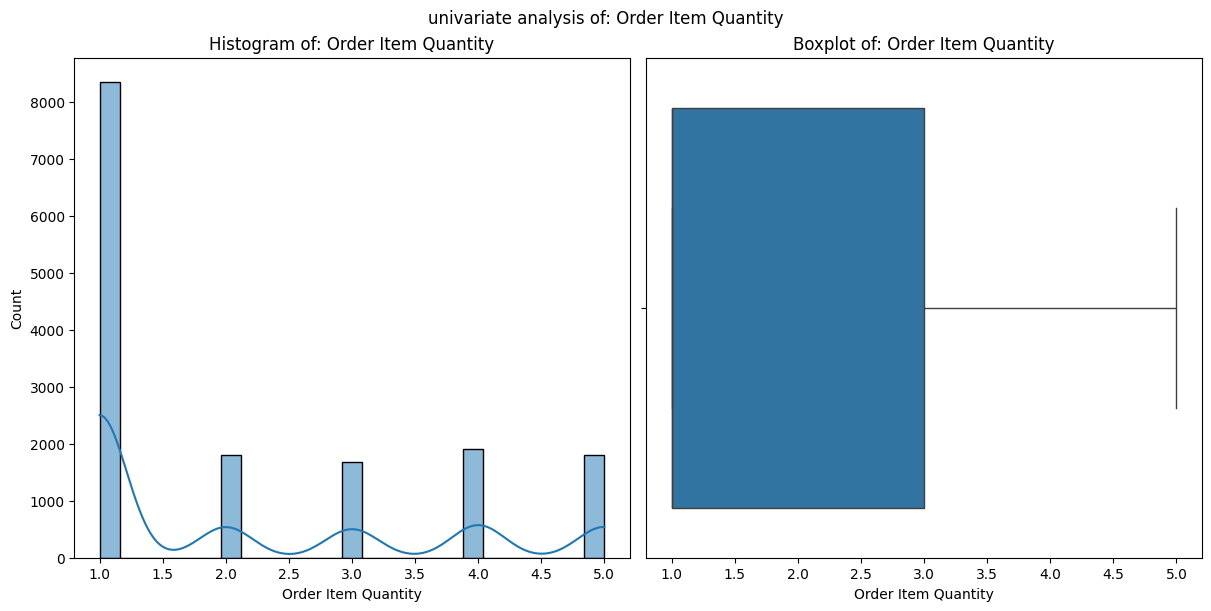

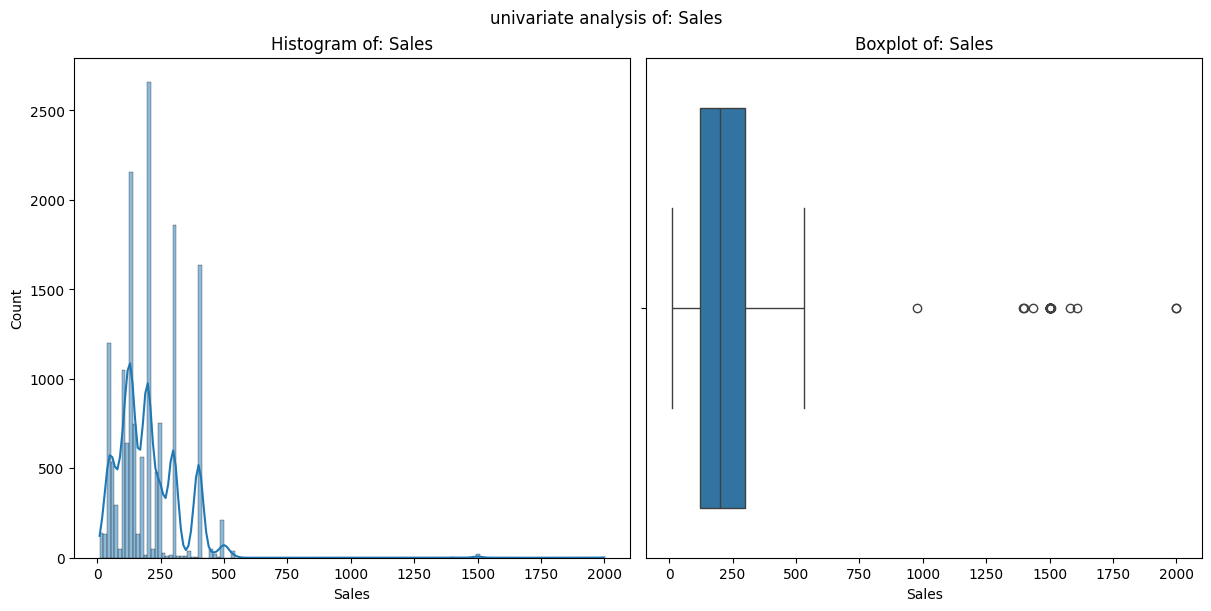

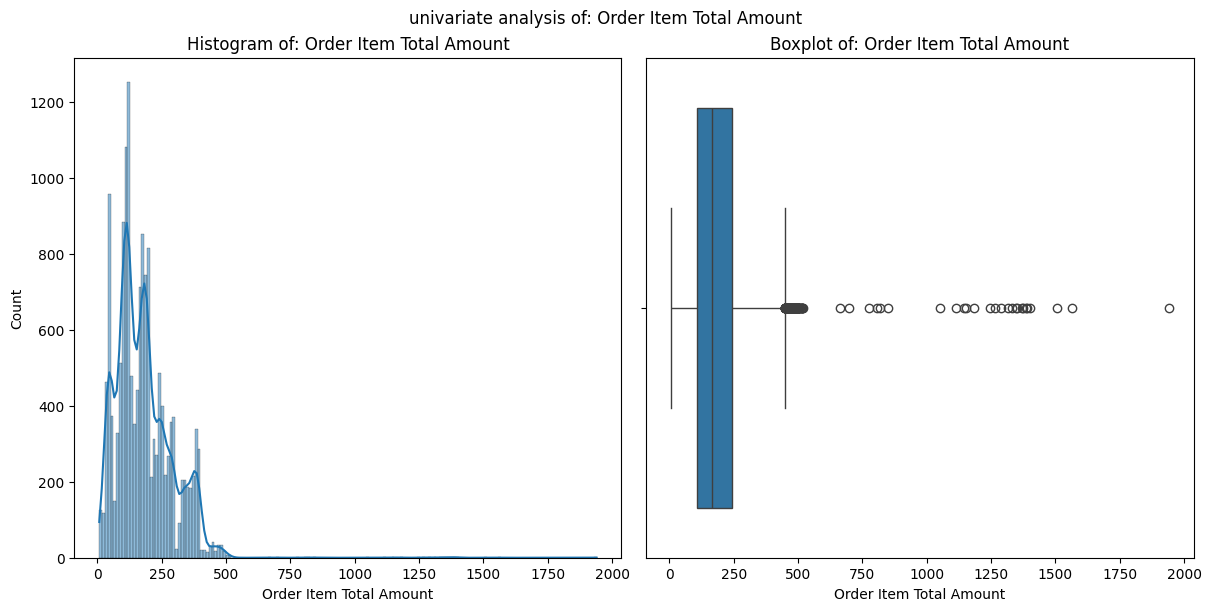

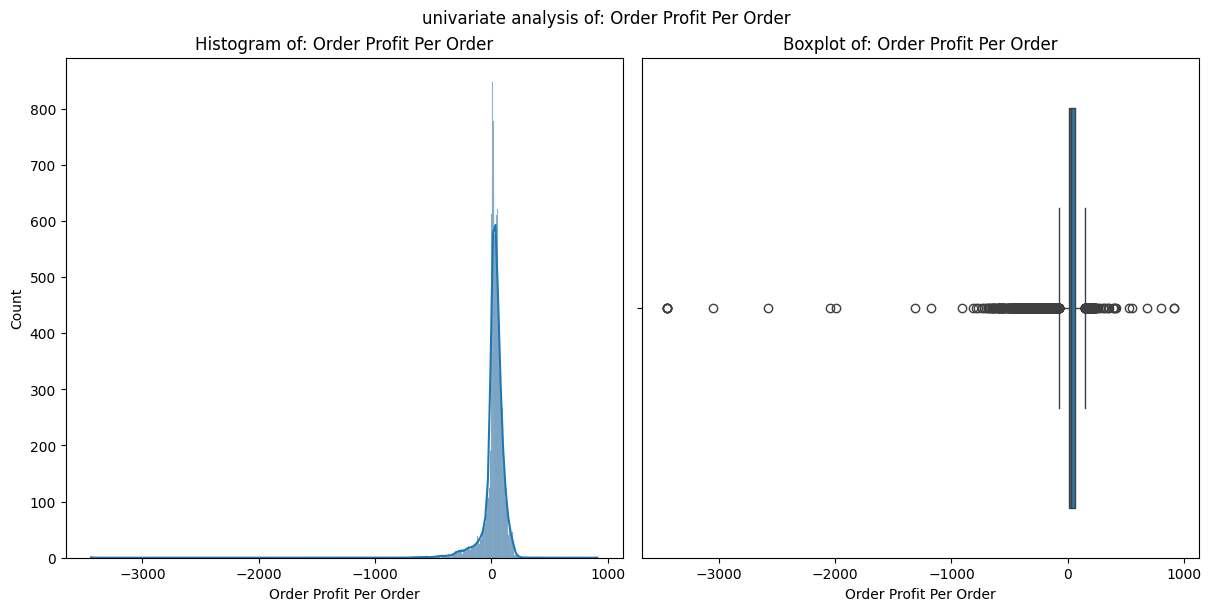

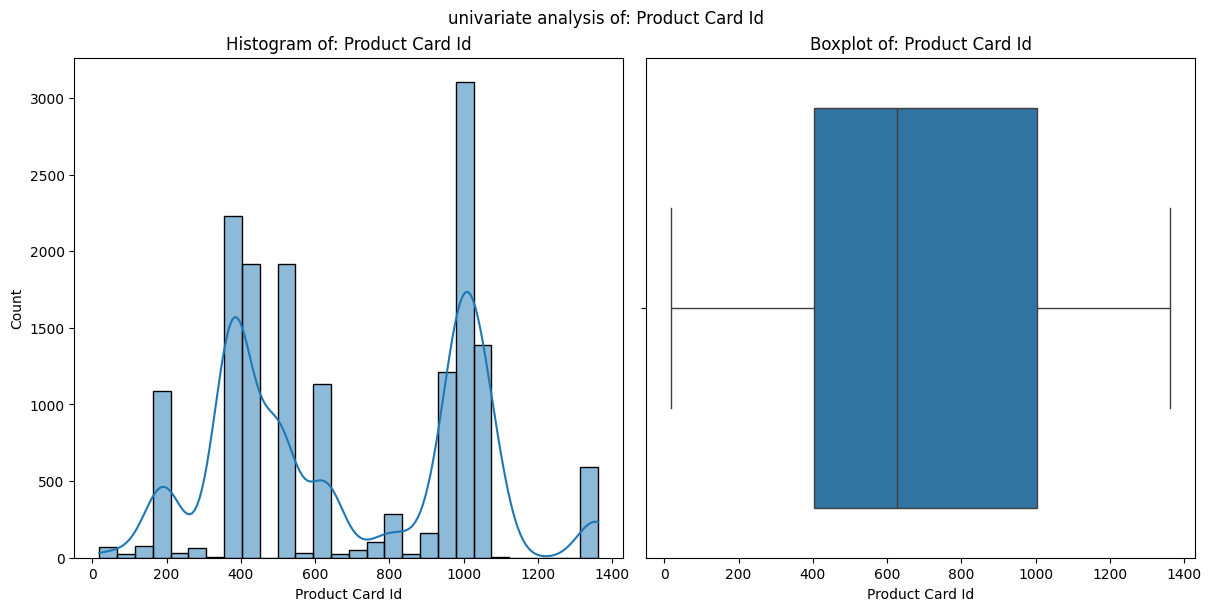

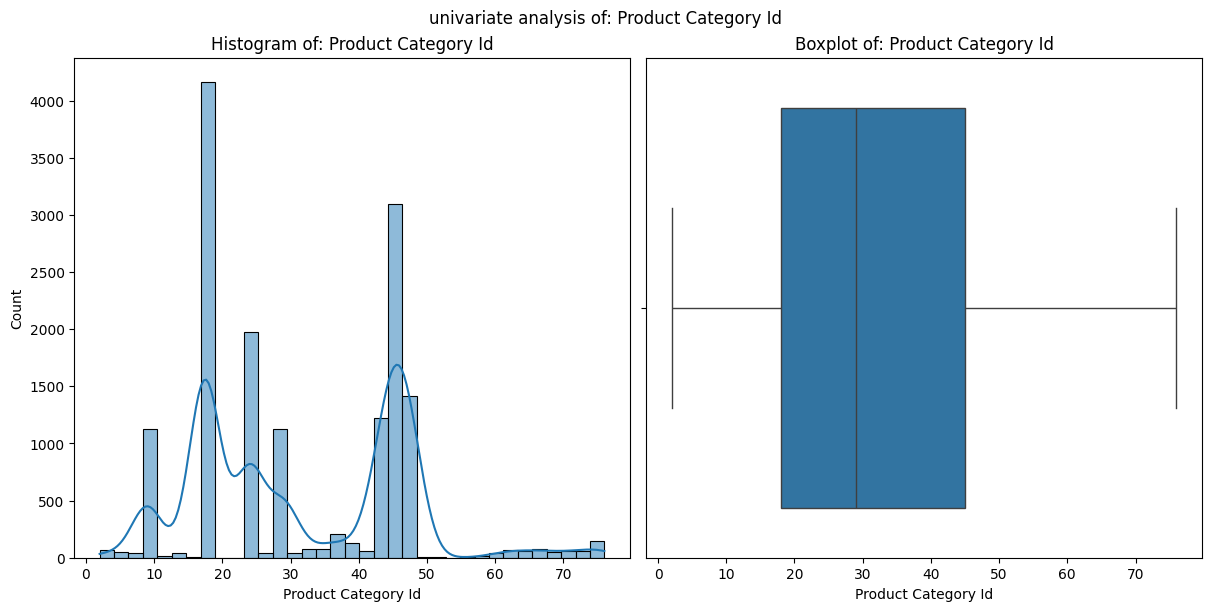

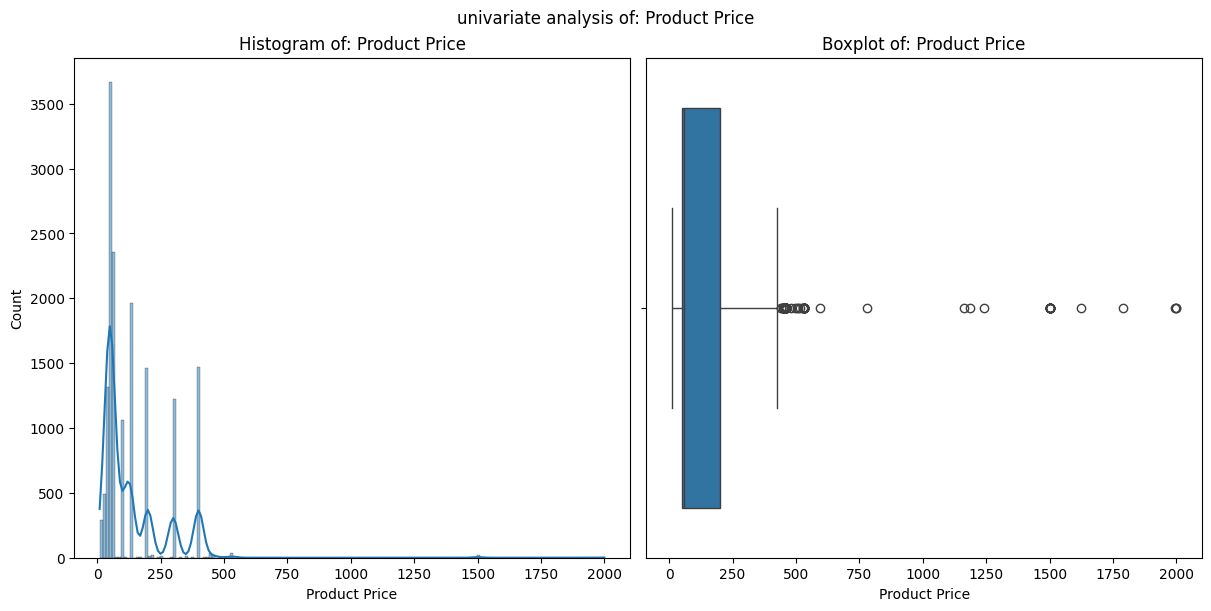

In [ ]:
for col in num_col:
  fig, axs =plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
  fig.suptitle(f"univariate analysis of: {col.replace('_', ' ').title()}")

  sns.histplot(data=SwiftChain_new, x=col, kde=True, ax=axs[0])
  axs[0].set_title(f"Histogram of: {col.replace('_', ' ').title()}")
  axs[0].set_xlabel(f"{col.replace('_', ' ').title()}")


  sns.boxplot(data=SwiftChain_new, x=col, ax=axs[1])
  axs[1].set_title(f"Boxplot of: {col.replace('_', ' ').title()}")
  axs[1].set_xlabel(f"{col.replace('_', ' ').title()}")

  plt.show()




checking for outliers

In [ ]:
#checking outliers in numerical columns
for col in SwiftChain_new.select_dtypes(include=["number"]).columns:
  Q1 = SwiftChain_new[col].quantile(0.25)
  Q3 = SwiftChain_new[col].quantile(0.75)

  IQR = Q3-Q1

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR

  outliers = SwiftChain_new[(SwiftChain_new[col] <= lower_limit) & (SwiftChain_new[col] >= upper_limit)]

  SwiftChain_new = SwiftChain_new[(SwiftChain_new[col] >= lower_limit) & (SwiftChain_new[col] <= upper_limit)]


#verifying ouliers removal

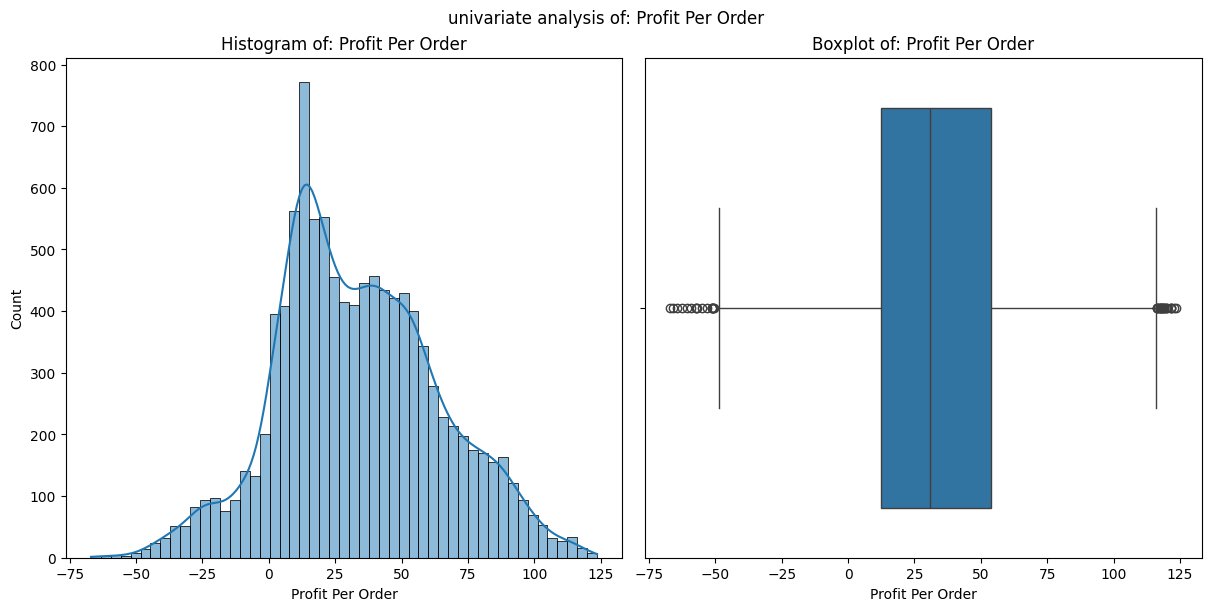

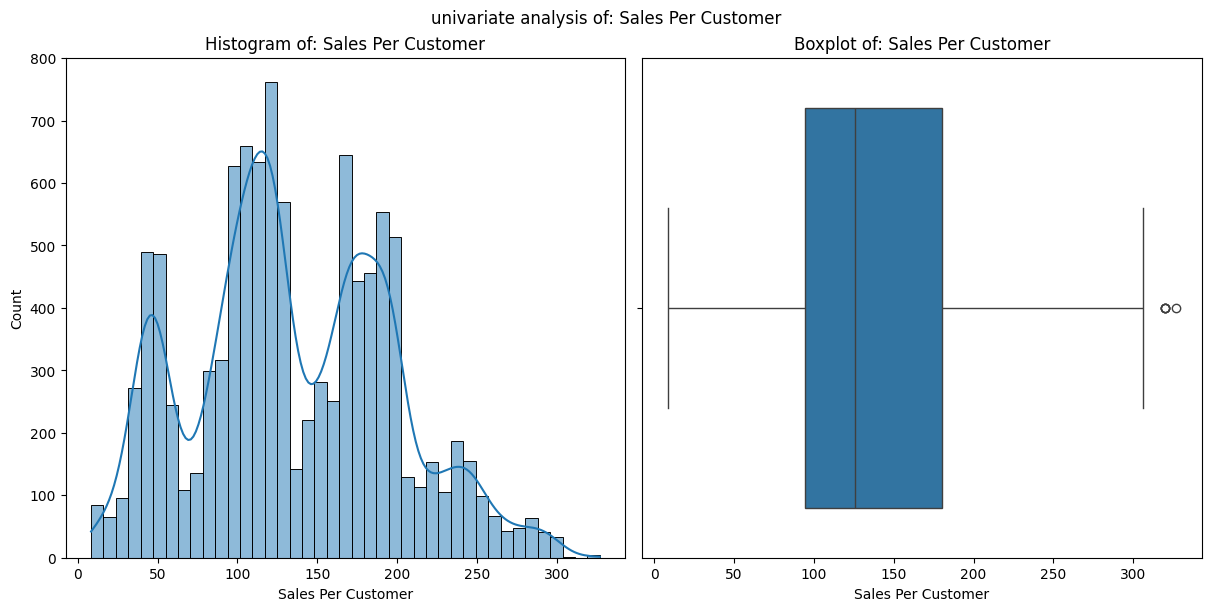

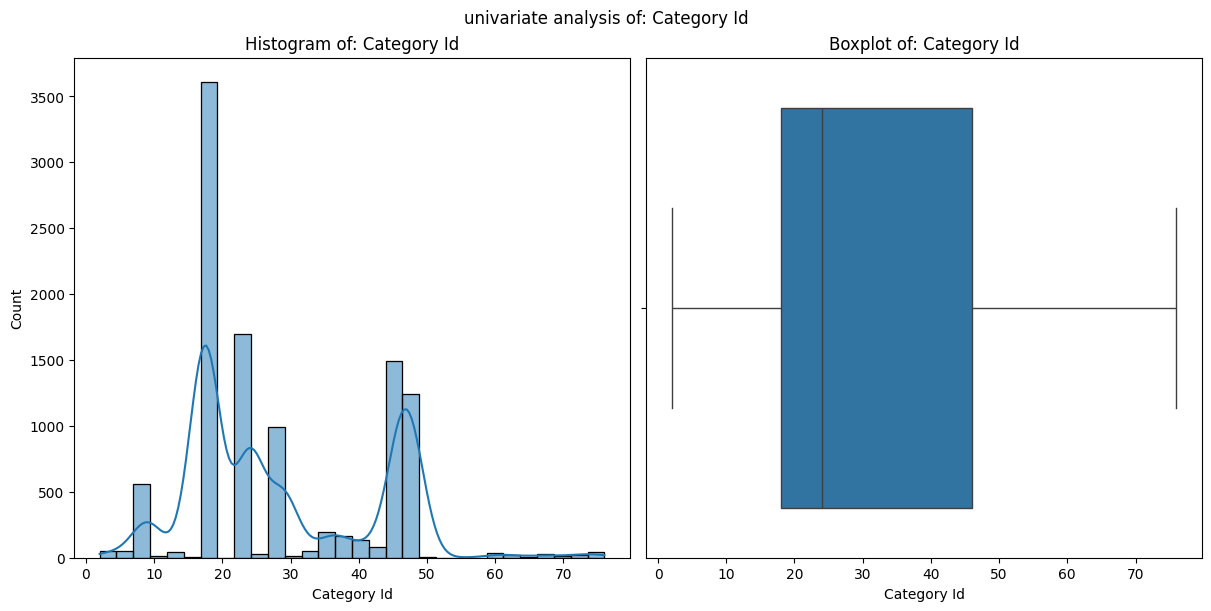

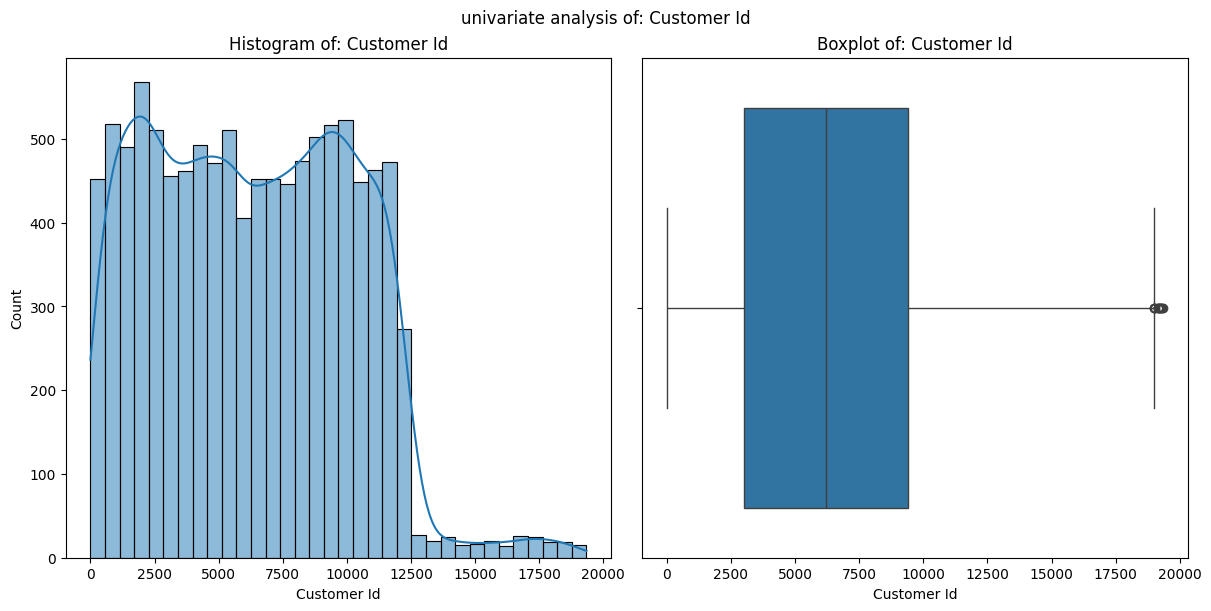

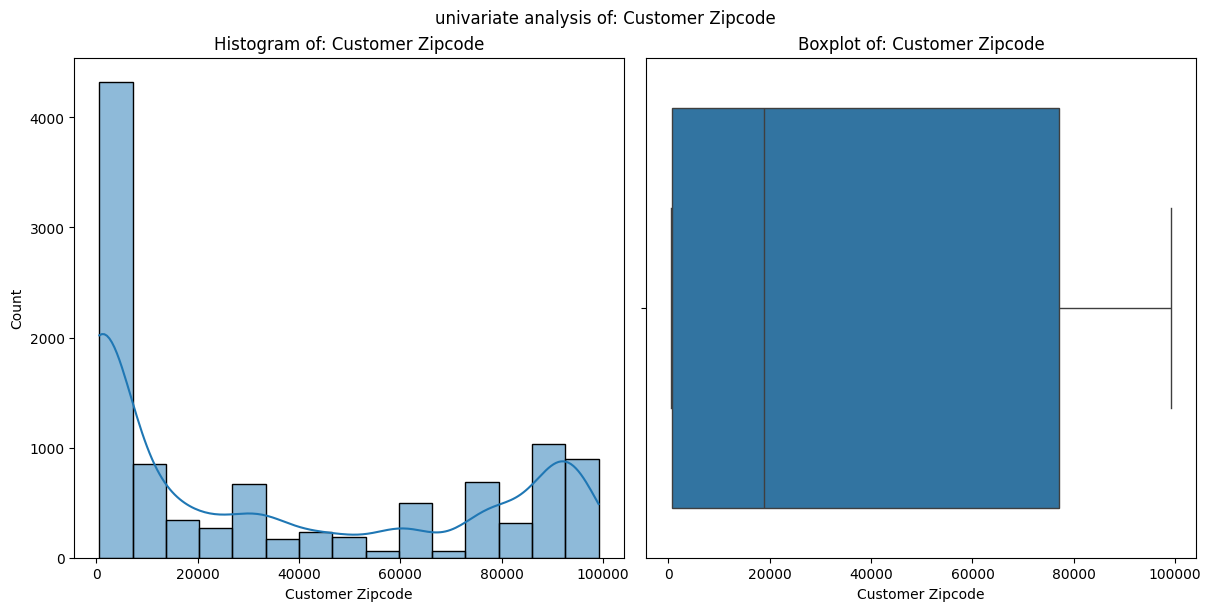

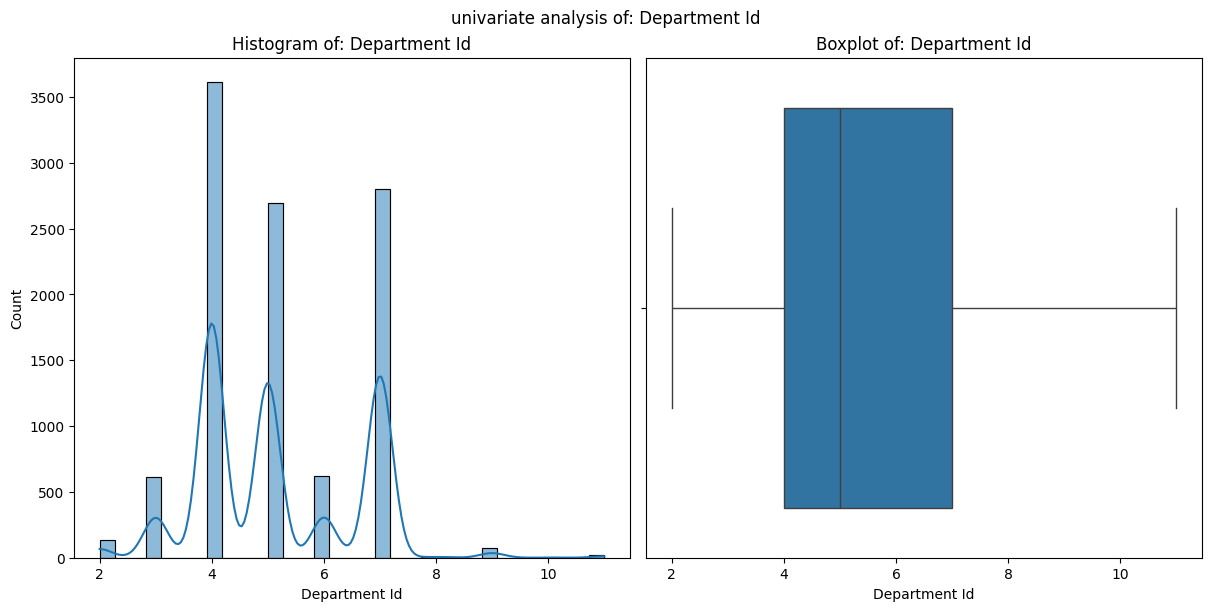

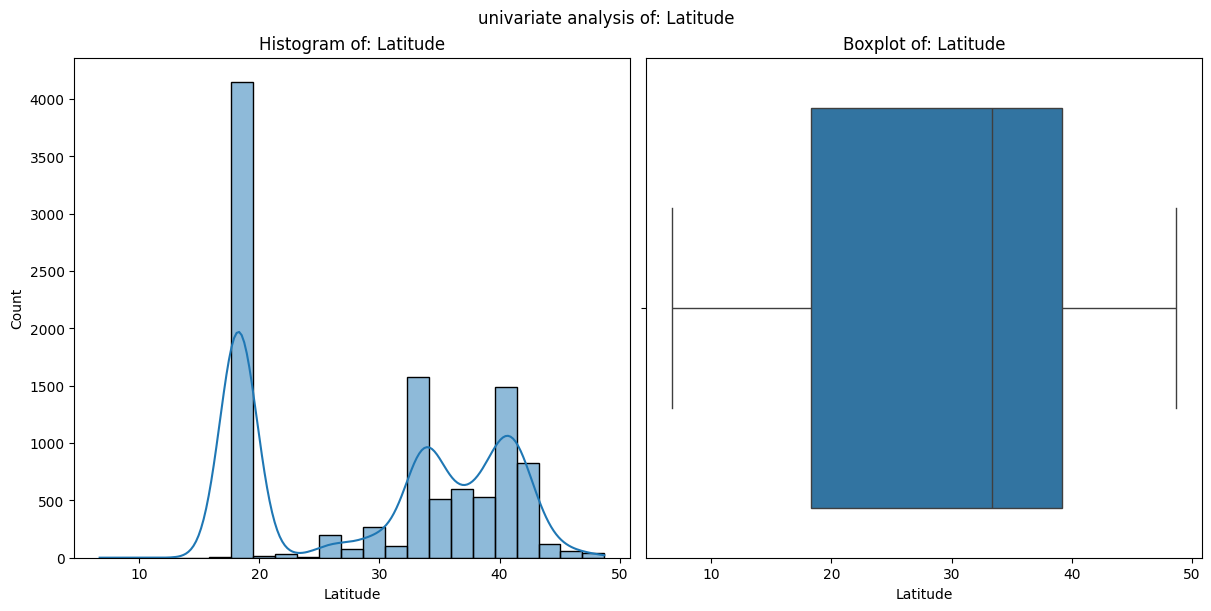

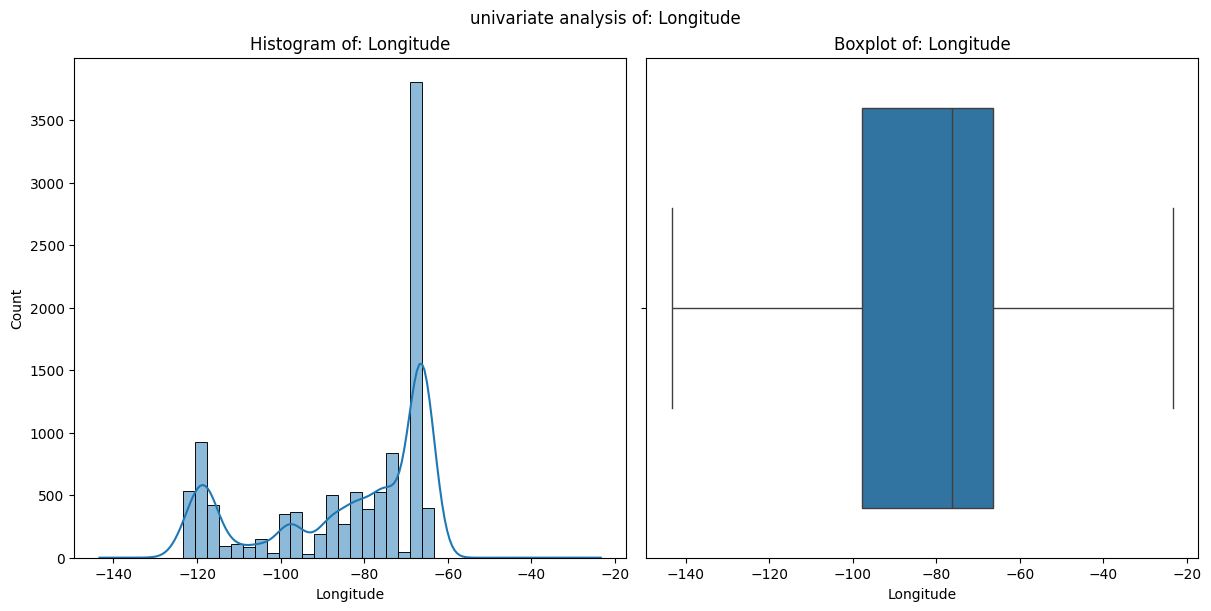

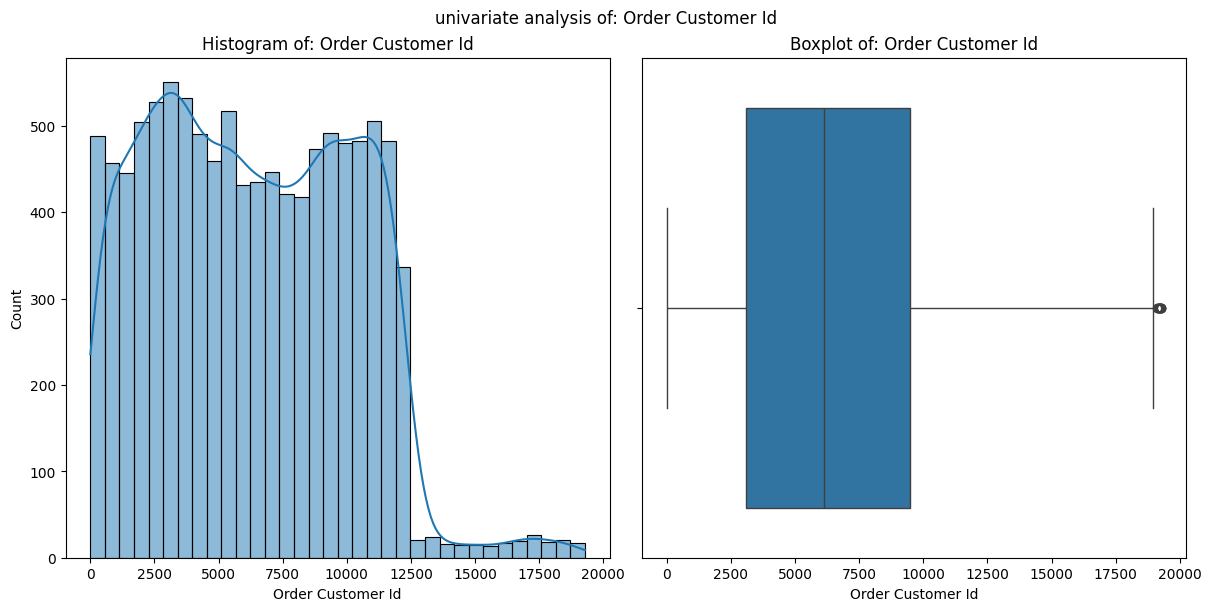

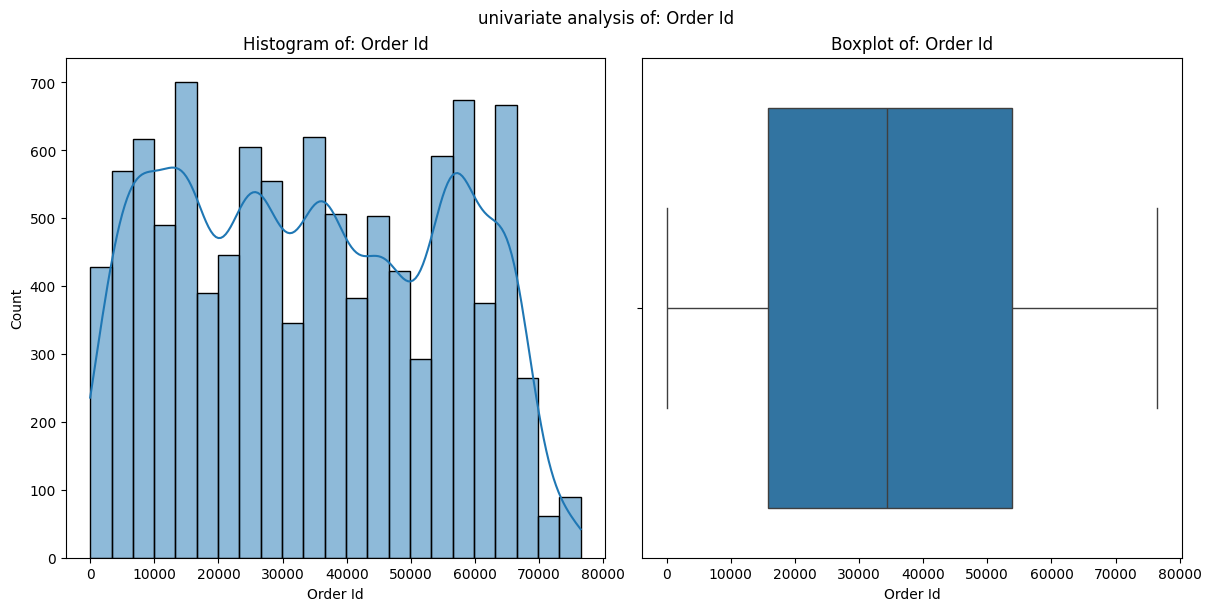

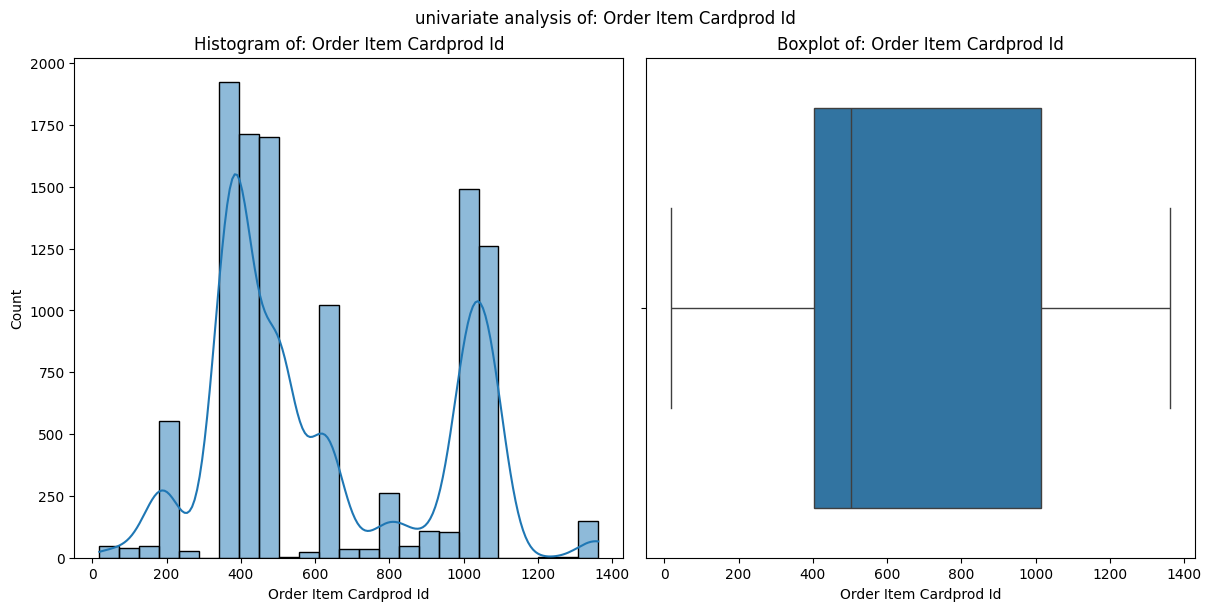

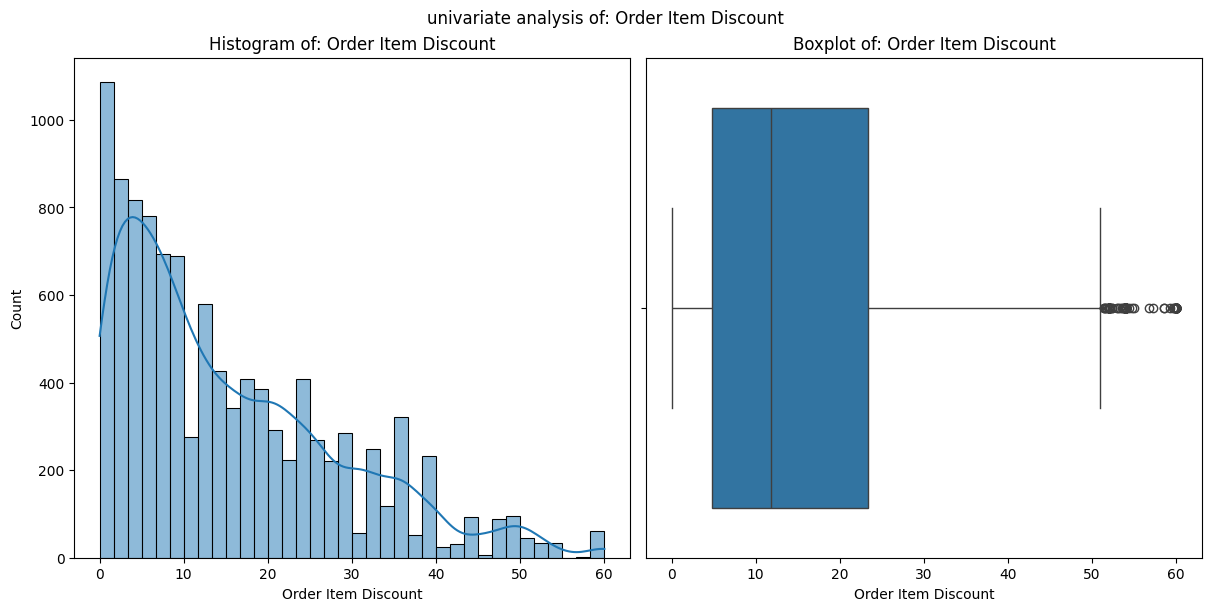

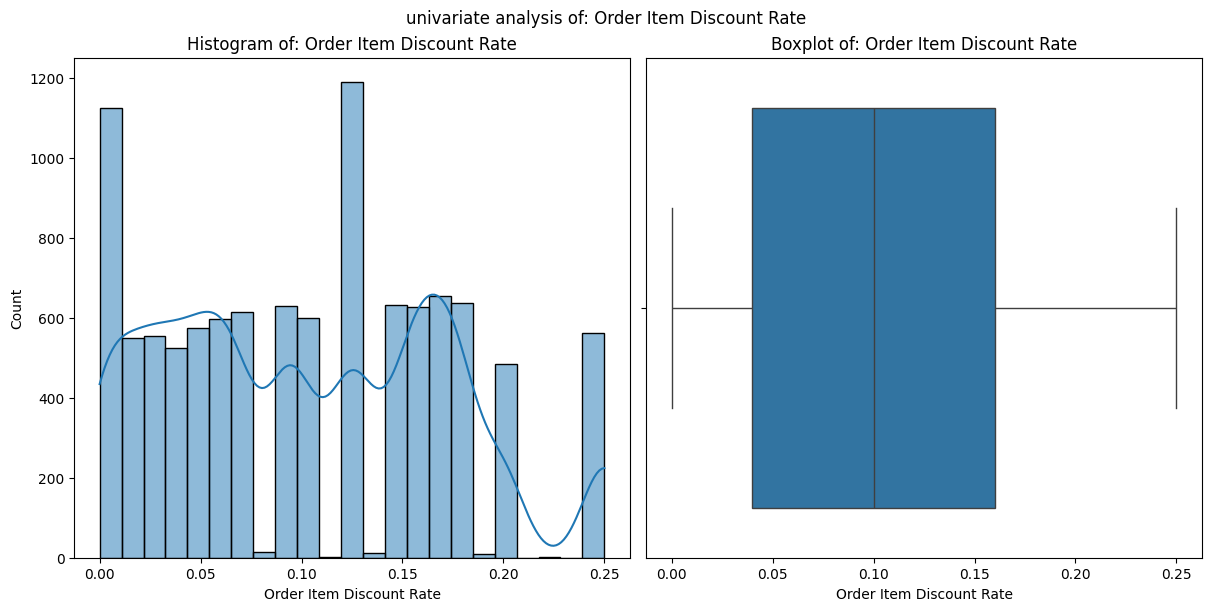

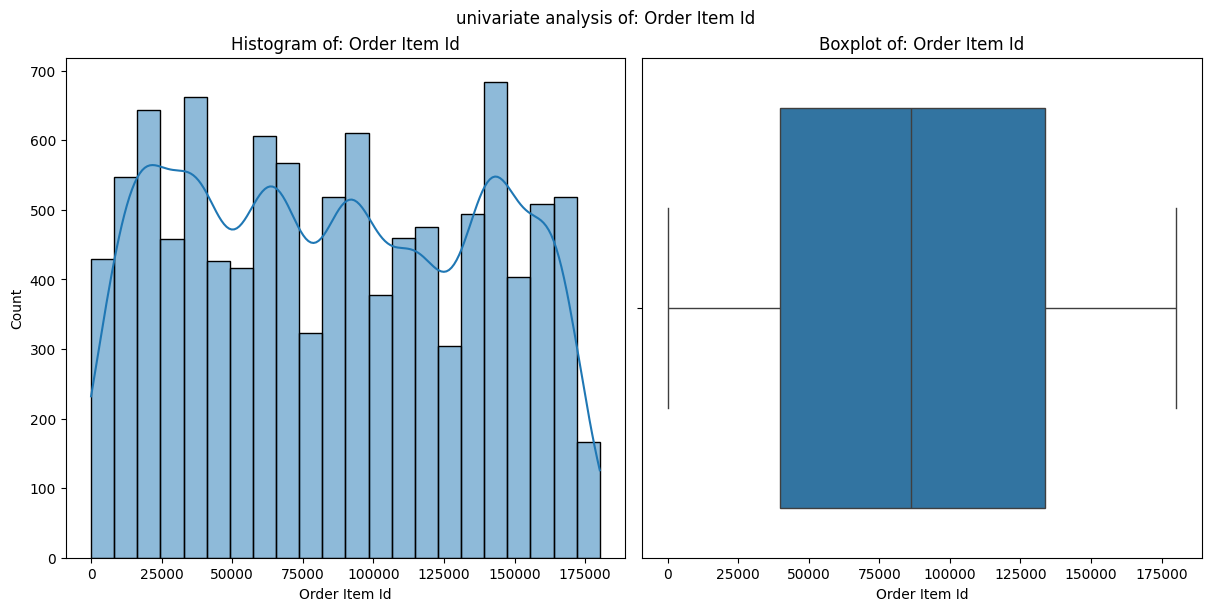

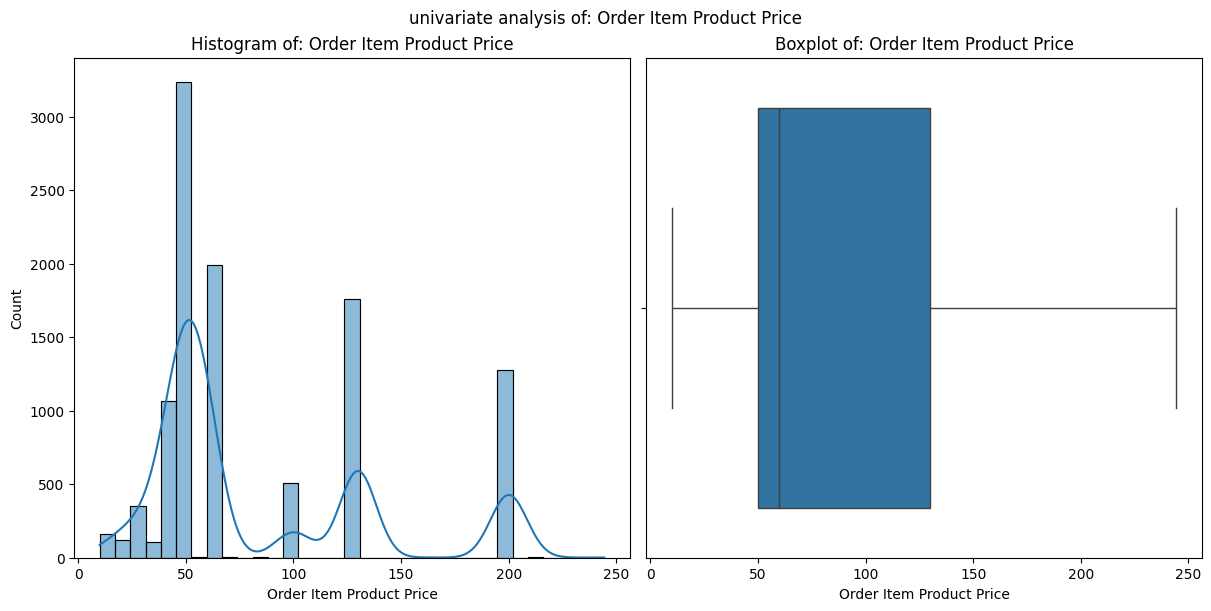

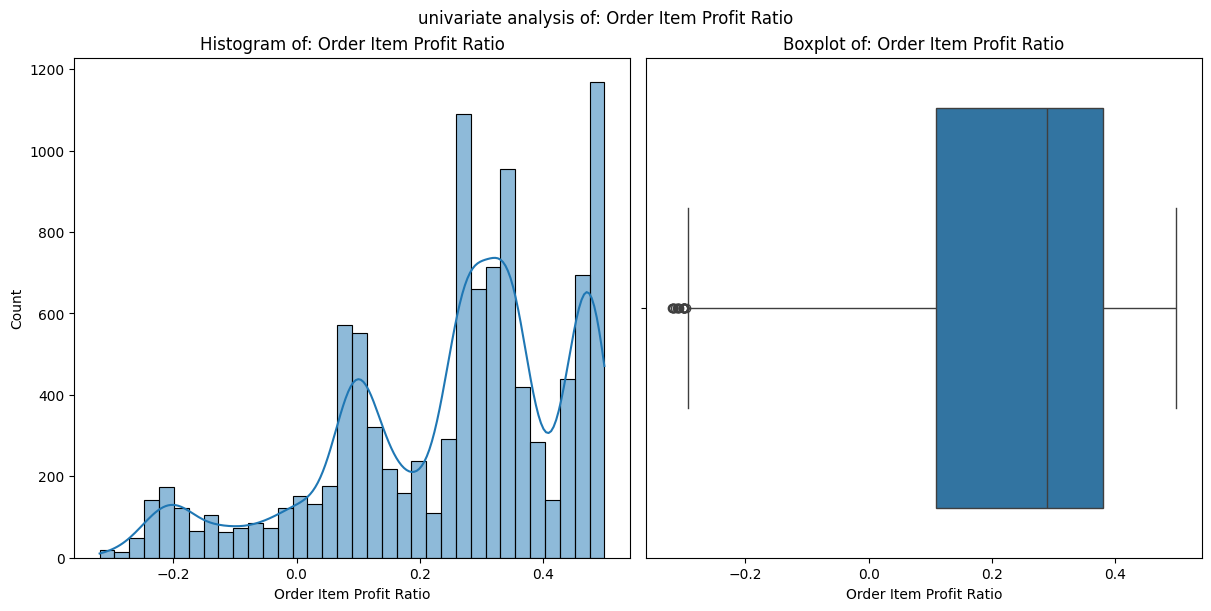

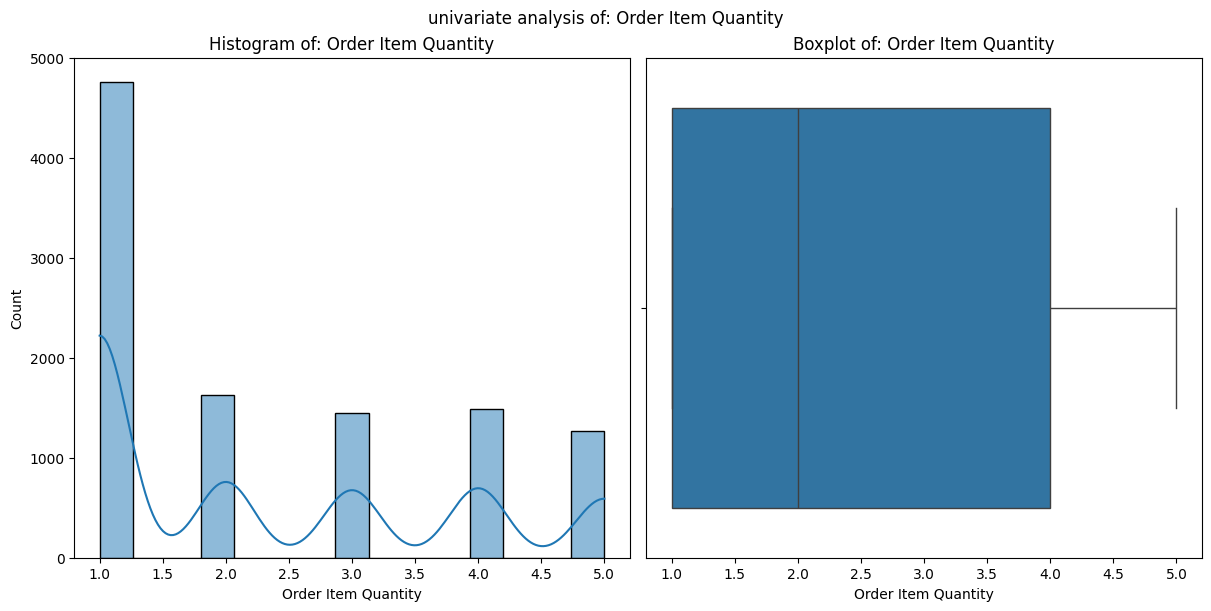

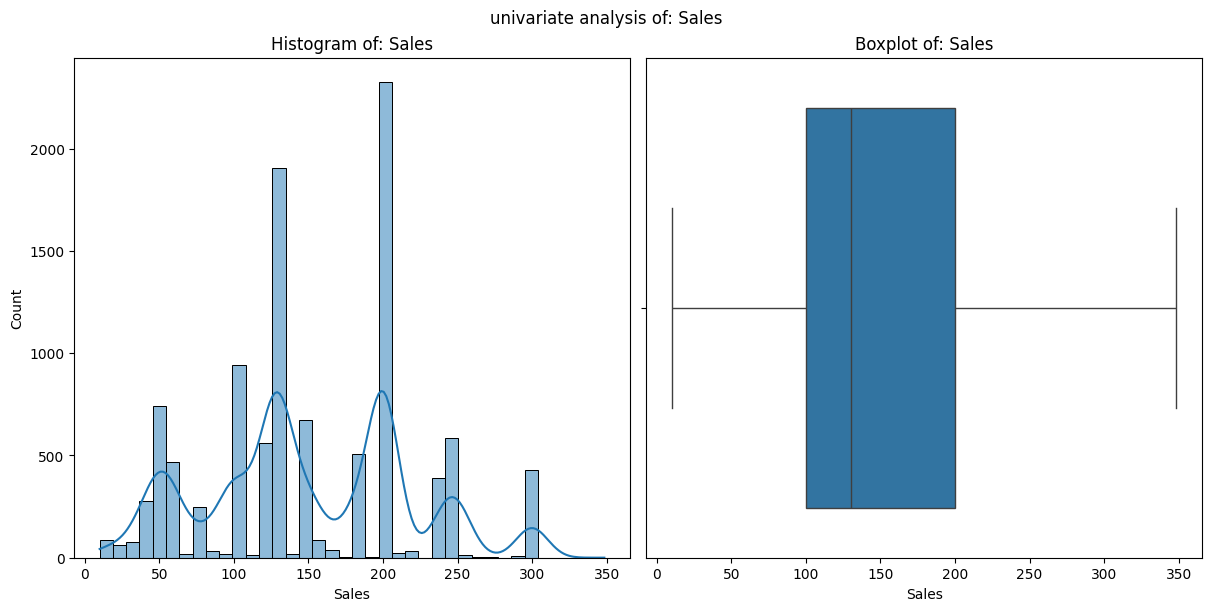

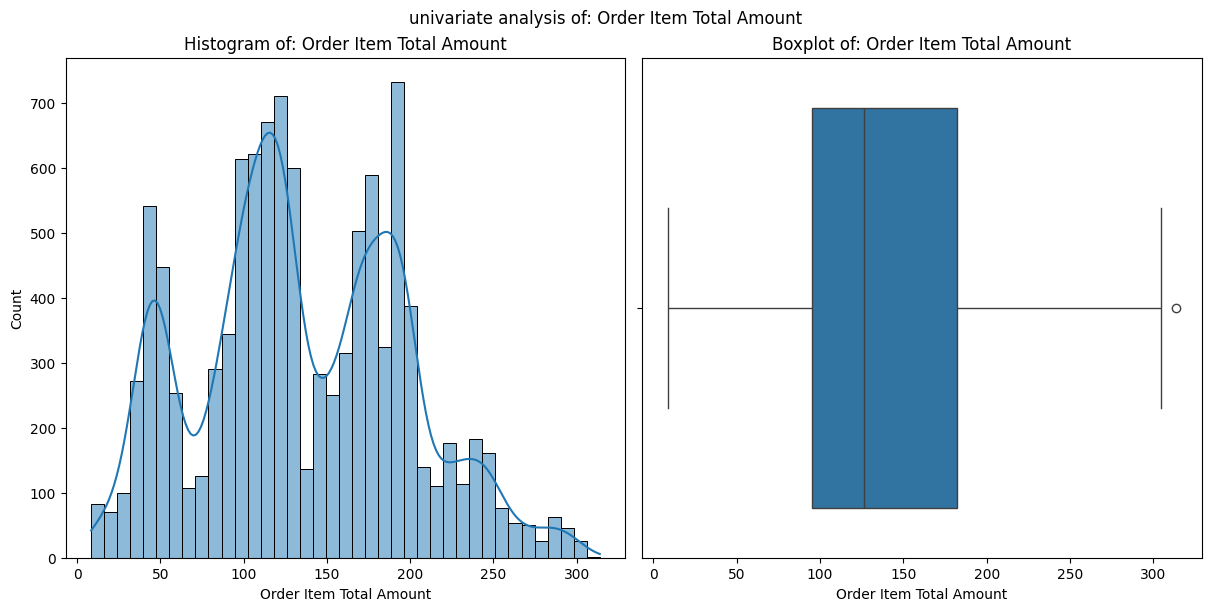

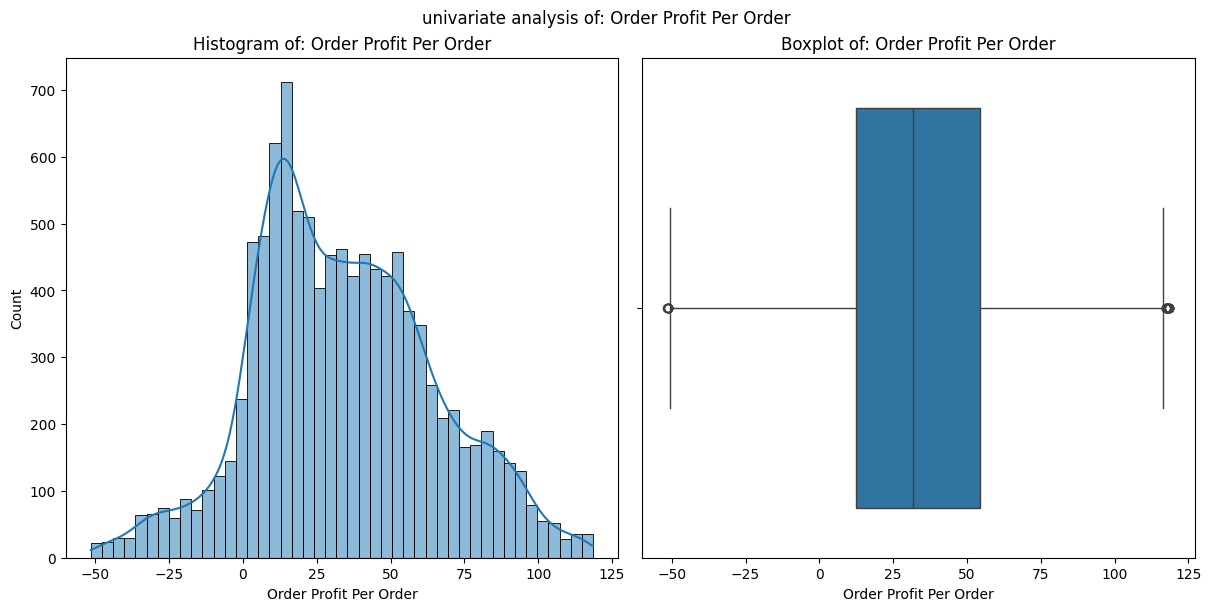

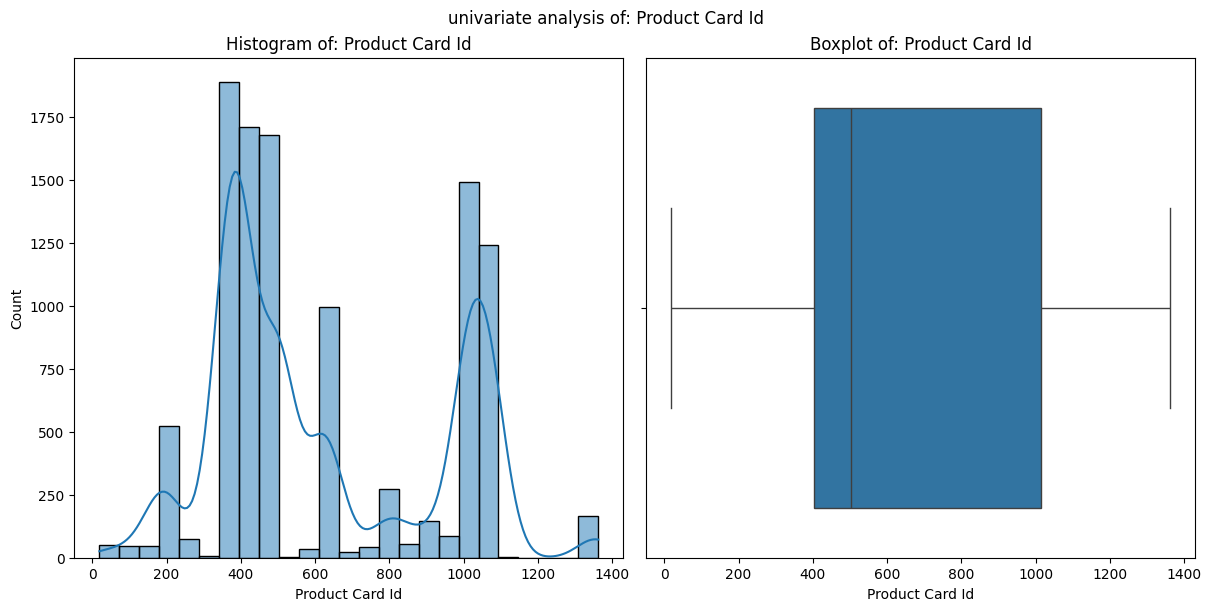

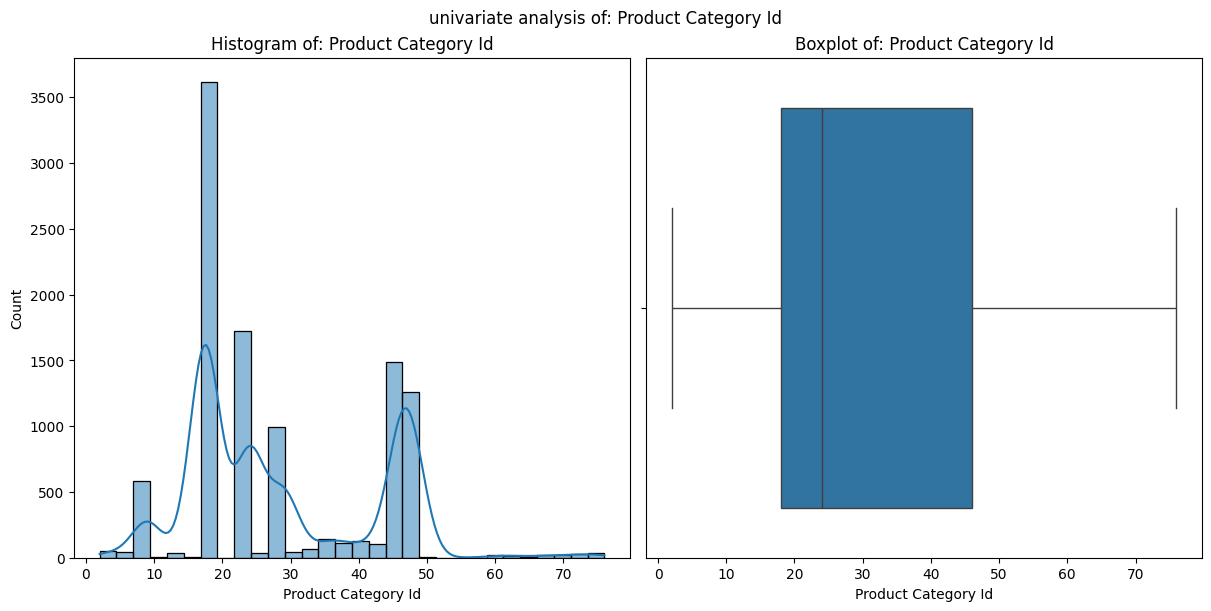

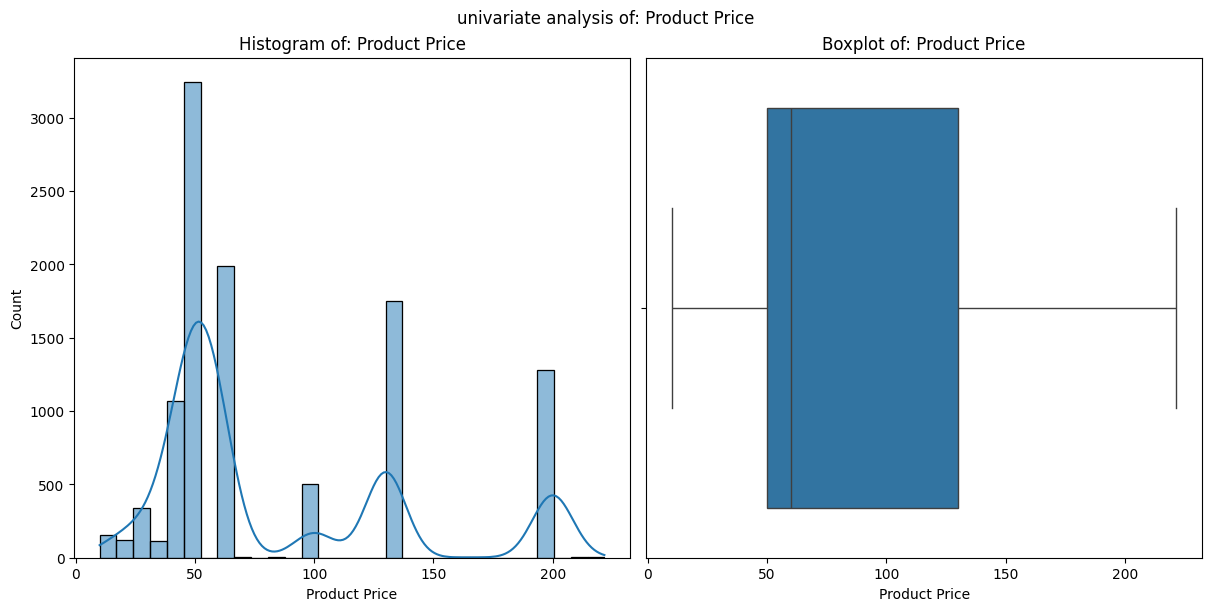

In [ ]:
for col in num_col:
  fig, axs =plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
  fig.suptitle(f"univariate analysis of: {col.replace('_', ' ').title()}")

  sns.histplot(data=SwiftChain_new, x=col, kde=True, ax=axs[0])
  axs[0].set_title(f"Histogram of: {col.replace('_', ' ').title()}")
  axs[0].set_xlabel(f"{col.replace('_', ' ').title()}")


  sns.boxplot(data=SwiftChain_new, x=col, ax=axs[1])
  axs[1].set_title(f"Boxplot of: {col.replace('_', ' ').title()}")
  axs[1].set_xlabel(f"{col.replace('_', ' ').title()}")

  plt.show()




Bivariate Categorical

/tmp/ipython-input-1616-1051864187.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=2)


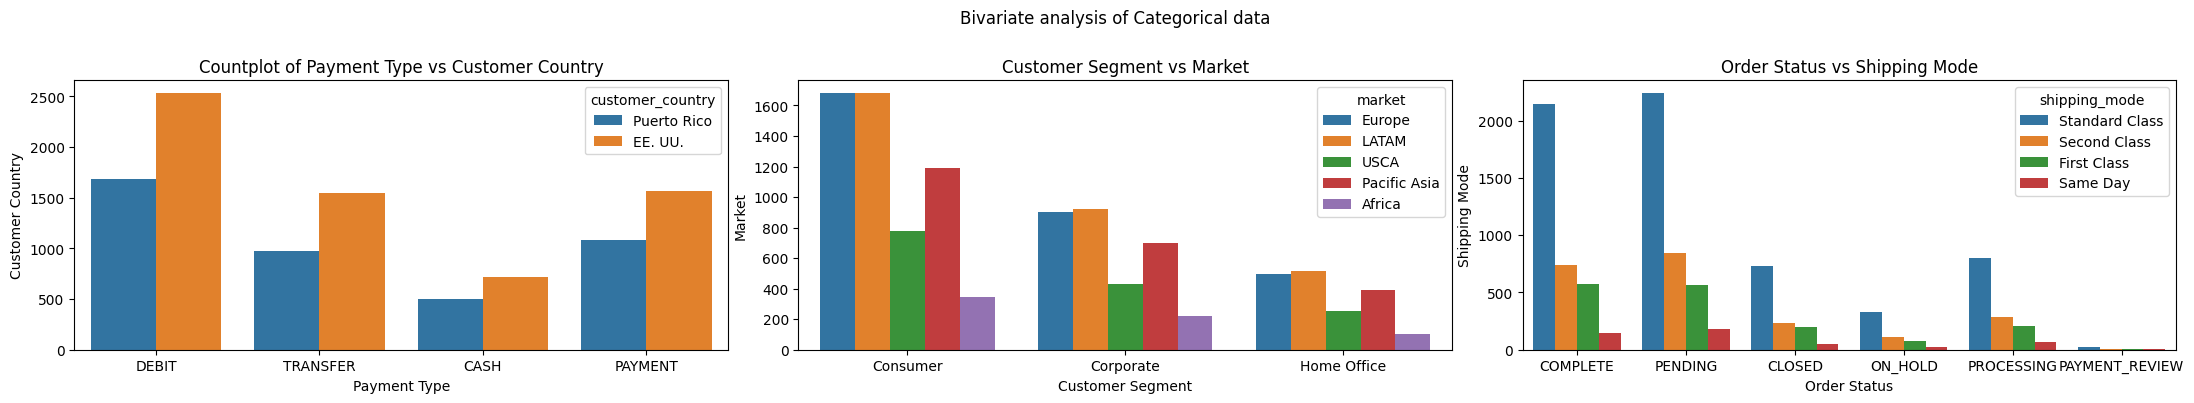

In [ ]:
fig, axs=plt.subplots(1,3,figsize=(22,4), constrained_layout=True)
fig.suptitle("Bivariate analysis of Categorical data")
fig.tight_layout(pad=2)

sns.countplot(x="payment_type", hue="customer_country", data=SwiftChain_new, ax=axs[0])
axs[0].set_title("Countplot of Payment Type vs Customer Country")
axs[0].set_xlabel("Payment Type")
axs[0].set_ylabel("Customer Country")


sns.countplot(x="customer_segment", hue="market", data=SwiftChain_new, ax=axs[1])
axs[1].set_title("Customer Segment vs Market")
axs[1].set_xlabel("Customer Segment")
axs[1].set_ylabel("Market")


sns.countplot(x="order_status", hue="shipping_mode", data=SwiftChain_new, ax=axs[2])
axs[2].set_title("Order Status vs Shipping Mode")
axs[2].set_xlabel("Order Status")
axs[2].set_ylabel("Shipping Mode")

plt.show()

/tmp/ipython-input-1617-2843882131.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=2)


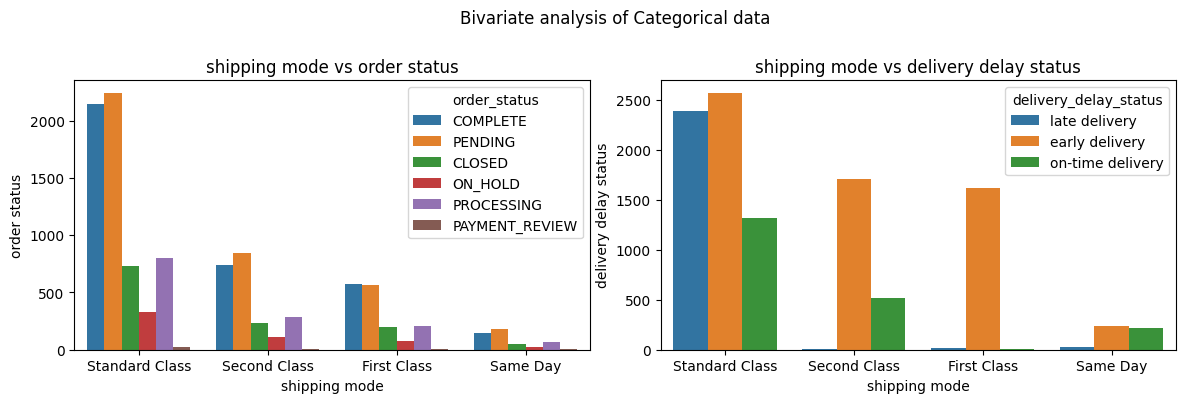

In [ ]:
fig, axs=plt.subplots(1,2,figsize=(12,4), constrained_layout=True)
fig.suptitle("Bivariate analysis of Categorical data")
fig.tight_layout(pad=2)

sns.countplot(x="shipping_mode", hue="order_status", data=SwiftChain_new, ax=axs[0])
axs[0].set_title("shipping mode vs order status")
axs[0].set_xlabel("shipping mode")
axs[0].set_ylabel("order status")


sns.countplot(x="shipping_mode", hue="delivery_delay_status", data=SwiftChain_new, ax=axs[1])
axs[1].set_title("shipping mode vs delivery delay status")
axs[1].set_xlabel("shipping mode")
axs[1].set_ylabel("delivery delay status")

plt.show()

#Descriptive Statistics

In [ ]:
SwiftChain_new.describe()

profit_per_order  sales_per_customer   category_id   customer_id  \
count      10597.000000        10597.000000  10597.000000  10597.000000   
mean          33.564617          134.425926     28.615462   6310.286561   
min          -66.965970            8.351162      2.000000      1.108005   
25%           12.324196           94.497986     18.000000   2988.567000   
50%           30.882183          125.943710     24.000000   6204.403000   
75%           53.828690          179.990000     46.000000   9392.942000   
max          123.619250          326.925320     76.000000  19341.078000   
std           30.618621           62.193534     13.800359   3824.425321   

       customer_zipcode  department_id      latitude     longitude  \
count      10597.000000   10597.000000  10597.000000  10597.000000   
mean       34685.972684       5.137046     29.609418    -84.040687   
min          603.613100       2.000000      6.691145   -143.343050   
25%          725.000000       4.000000     18.262445    -97.784950   
50%        18814.357000       5.000000     33.363823    -76.150475   
75%        77084.630000       7.000000     39.222000    -66.370575   
max        99104.125000      11.000000     48.730267    -23.405012   
std        37106.787736       1.409575      9.820837     19.939309   

       order_customer_id      order_id  ...  order_item_profit_ratio  \
count       10597.000000  10597.000000  ...             10597.000000   
mean         6318.720443  34475.137201  ...                 0.250768   
min             3.429665      2.450626  ...                -0.319789   
25%          3090.693000  15877.708000  ...                 0.110000   
50%          6115.061000  34304.457000  ...                 0.290000   
75%          9476.909000  53803.586000  ...                 0.380000   
max         19284.953000  76480.700000  ...                 0.500000   
std          3816.191403  20494.386912  ...                 0.189837   

       order_item_quantity         sales  order_item_total_amount  \
count         10597.000000  10597.000000             10597.000000   
mean              2.327161    149.713917               134.567708   
min               1.000000      9.990272                 8.445535   
25%               1.000000    100.000000                94.966370   
50%               2.000000    129.990000               126.090000   
75%               4.000000    199.990000               181.942550   
max               5.000000    348.445800               313.806400   
std               1.455226     68.084366                62.032802   

       order_profit_per_order  product_card_id  product_category_id  \
count            10597.000000     10597.000000         10597.000000   
mean                34.034815       623.646088            28.529740   
min                -51.540417        19.004093             2.000000   
25%                 12.316416       403.000000            18.000000   
50%                 31.559189       502.000000            24.000000   
75%                 54.261326      1014.000000            46.000000   
max                118.560060      1363.000000            76.000000   
std                 30.769241       304.515543            13.750901   

       product_price                order_date_norm  \
count   10597.000000                          10597   
mean       83.020846  2016-05-17 06:11:14.681513728   
min         9.990000            2015-01-01 00:00:00   
25%        49.980000            2015-08-09 00:00:00   
50%        59.990000            2016-05-15 00:00:00   
75%       129.990000            2017-02-25 00:00:00   
max       221.670460            2018-11-07 00:00:00   
std        53.986815                            NaN   

                  shipping_date_norm  
count                          10597  
mean   2016-05-25 05:52:13.226384896  
min              2015-01-02 00:00:00  
25%              2015-08-23 00:00:00  
50%              2016-05-20 00:00:00  
75%              2017-03-04 00:00:00  
max              201

In [ ]:
SwiftChain_new.groupby("customer_country")["order_item_quantity"].describe()

count      mean       std  min  25%  50%  75%  max
customer_country                                                     
EE. UU.           6358.0  2.334671  1.461687  1.0  1.0  2.0  4.0  5.0
Puerto Rico       4239.0  2.315897  1.445581  1.0  1.0  2.0  4.0  5.0

In [ ]:
SwiftChain_new.groupby("customer_segment")["order_item_quantity"].describe()

count      mean       std  min  25%  50%  75%  max
customer_segment                                                     
Consumer          5670.0  2.342434  1.454168  1.0  1.0  2.0  4.0  5.0
Corporate         3172.0  2.315831  1.471359  1.0  1.0  2.0  4.0  5.0
Home Office       1755.0  2.298296  1.429291  1.0  1.0  2.0  3.0  5.0

In [ ]:
SwiftChain_new.groupby("market")["order_item_quantity"].describe()

count      mean       std  min  25%  50%  75%  max
market                                                           
Africa         669.0  2.264298  1.423479  1.0  1.0  2.0  3.0  5.0
Europe        3079.0  2.330115  1.461065  1.0  1.0  2.0  4.0  5.0
LATAM         3115.0  2.369403  1.461196  1.0  1.0  2.0  4.0  5.0
Pacific Asia  2275.0  2.230330  1.436628  1.0  1.0  2.0  3.0  5.0
USCA          1459.0  2.410555  1.465908  1.0  1.0  2.0  4.0  5.0

In [ ]:
SwiftChain_new.groupby("order_status")["order_item_quantity"].describe()

count      mean       std  min  25%  50%  75%  max
order_status                                                       
CLOSED          1209.0  2.320449  1.482522  1.0  1.0  2.0  4.0  5.0
COMPLETE        3605.0  2.308600  1.438696  1.0  1.0  2.0  4.0  5.0
ON_HOLD          548.0  2.370438  1.449832  1.0  1.0  2.0  4.0  5.0
PAYMENT_REVIEW    42.0  2.952381  1.447494  1.0  1.0  3.0  4.0  5.0
PENDING         3828.0  2.328109  1.464669  1.0  1.0  2.0  4.0  5.0
PROCESSING      1365.0  2.342857  1.447909  1.0  1.0  2.0  4.0  5.0

In [ ]:
SwiftChain_new.groupby("shipping_mode")["order_item_quantity"].describe()

count      mean       std  min  25%  50%  75%  max
shipping_mode                                                      
First Class     1631.0  2.287607  1.432803  1.0  1.0  2.0  3.0  5.0
Same Day         474.0  2.341772  1.500270  1.0  1.0  2.0  4.0  5.0
Second Class    2225.0  2.336001  1.454863  1.0  1.0  2.0  4.0  5.0
Standard Class  6267.0  2.333212  1.457869  1.0  1.0  2.0  4.0  5.0

In [ ]:
SwiftChain_new.groupby("delivery_delay_status")["order_item_quantity"].describe()

count      mean       std  min  25%  50%  75%  max
delivery_delay_status                                                     
early delivery         6120.0  2.335734  1.456339  1.0  1.0  2.0  4.0  5.0
late delivery          2425.0  2.315876  1.453918  1.0  1.0  2.0  4.0  5.0
on-time delivery       2052.0  2.314931  1.453984  1.0  1.0  2.0  4.0  5.0

In [ ]:
SwiftChain_new.groupby("payment_type")["order_item_quantity"].describe()

count      mean       std  min  25%  50%  75%  max
payment_type                                                     
CASH          1212.0  2.318831  1.482899  1.0  1.0  2.0  4.0  5.0
DEBIT         4218.0  2.318991  1.440697  1.0  1.0  2.0  4.0  5.0
PAYMENT       2646.0  2.329932  1.461668  1.0  1.0  2.0  4.0  5.0
TRANSFER      2521.0  2.341928  1.459949  1.0  1.0  2.0  4.0  5.0

In [ ]:
corr_matrix = num_col.corr()
corr_matrix

profit_per_order  sales_per_customer  category_id  \
profit_per_order                  1.000000            0.147240     0.038137   
sales_per_customer                0.147240            1.000000     0.205754   
category_id                       0.038137            0.205754     1.000000   
customer_id                       0.020850            0.052742     0.241735   
customer_zipcode                  0.010414            0.024125    -0.008213   
department_id                     0.058532            0.203006     0.901334   
latitude                          0.027892            0.013770     0.001199   
longitude                        -0.005826           -0.019031     0.011587   
order_customer_id                 0.019059            0.044580     0.245408   
order_id                          0.013920            0.070075     0.181553   
order_item_cardprod_id            0.054868            0.220853     0.987411   
order_item_discount               0.040772            0.483849     0.104496   
order_item_discount_rate         -0.019145           -0.132516    -0.006075   
order_item_id                     0.021978            0.069544     0.171372   
order_item_product_price          0.115296            0.737938     0.450164   
order_item_profit_ratio           0.811857            0.003929     0.019152   
order_item_quantity               0.018319            0.122020    -0.295748   
sales                             0.140960            0.953257     0.214261   
order_item_total_amount           0.134271            0.966019     0.217694   
order_profit_per_order            0.825745            0.061660     0.045873   
product_card_id                   0.051849            0.213983     0.990537   
product_category_id               0.054286            0.215965     0.992837   
product_price                     0.147285            0.739894     0.447428   

                          customer_id  customer_zipcode  department_id  \
profit_per_order             0.020850          0.010414       0.058532   
sales_per_customer           0.052742          0.024125       0.203006   
category_id                  0.241735         -0.008213       0.901334   
customer_id                  1.000000         -0.004067       0.121832   
customer_zipcode            -0.004067          1.000000      -0.007208   
department_id                0.121832         -0.007208       1.000000   
latitude                     0.001443          0.589270       0.003331   
longitude                    0.008616         -0.954688       0.008006   
order_customer_id            0.997078         -0.003110       0.123966   
order_id                     0.183324         -0.007829       0.098300   
order_item_cardprod_id       0.199293         -0.008949       0.916497   
order_item_discount          0.039805          0.016795       0.103108   
order_item_discount_rate     0.000930         -0.006298      -0.010225   
order_item_id                0.172817         -0.007779       0.094905   
order_item_product_price     0.103279          0.019164       0.430816   
order_item_profit_ratio      0.011419          0.001151       0.022951   
order_item_quantity         -0.079517          0.001636      -0.261122   
sales                        0.052829          0.024530       0.213678   
order_item_total_amount      0.044206          0.023673       0.218535   
order_profit_per_order      -0.006923          0.003743       0.051615   
product_card_id              0.200715         -0.008586       0.919080   
product_category_id          0.241623         -0.007345       0.897831   
product_price                0.102492          0.019982       0.429404   

                          latitude  longitude  order_customer_id  order_id  \
profit_per_order          0.027892  -0.005826           0.019059  0.013920   
sales_per_customer        0.013770  -0.019031           0.044580  0.070075   
category_id               0.001199   0.011587           0.245408  0.181553   
customer_id               0.001443   0.0

order profit per order has a very strong positive correlative with profit order, customer id has a strong positive correlaton with latitude. a lot of the other variables have no correlation at all while some have strong negative correlation

#Feature Engineering

creating shipping duration

In [ ]:
SwiftChain_new["shipping_duration"] = (SwiftChain_new["shipping_date_norm"] - SwiftChain_new["order_date_norm"]).dt.days

creating order day of week and order month

In [ ]:
SwiftChain_new["order_day_week"]= SwiftChain_new["order_date_norm"].dt.dayofweek
SwiftChain_new["order_month"]= SwiftChain_new["order_date_norm"].dt.month


manually encoding shipping mode to give ordinal meaninng

In [ ]:
shipping_map = {"Same Day":0, "First Class":1, "Second Class":2, "Standard Class":3}
SwiftChain_new["shipping_mode_encod"] = SwiftChain_new["shipping_mode"].map(shipping_map)

#Data preprocessing

splitting data into features and target and dropping all IDs and also columns not needed

In [ ]:
#separating target and features
x = SwiftChain_new.drop(["category_id", "customer_id", "customer_zipcode", "department_id", "order_customer_id", "order_id", "order_item_cardprod_id", "order_item_id", "product_card_id", "product_category_id", "shipping_mode", "order_profit_per_order", "profit_per_order", "order_item_profit_ratio", "sales_per_customer", "order_item_total_amount", "sales", "product_price", "category_name", "product_name", "delivery_delay_status"], axis=1)
y = SwiftChain_new["delivery_delay_status"]

#Reasons for dropping some columns
Order item product price and product price are the same.

order item total amount is derived from quantity , price and discount .therefore removed , same with sales, profit is calculated after delivery ,thus all profit related amounts removed


All IDs are removed

In [ ]:
#viewing new features
x.head()

payment_type customer_city customer_country customer_segment customer_state  \
0        DEBIT        Caguas      Puerto Rico         Consumer             PR   
1     TRANSFER   Albuquerque          EE. UU.         Consumer             CA   
2        DEBIT      Amarillo      Puerto Rico         Consumer             PR   
4        DEBIT       Peabody          EE. UU.         Consumer             CA   
5         CASH        Caguas      Puerto Rico         Consumer             PR   

  department_name   latitude   longitude  market    order_city  ...  \
0        Footwear  18.359064  -66.370575  Europe         Viena  ...   
1        Fan Shop  37.636528 -121.119630   LATAM  Buenos Aires  ...   
2        Fan Shop  18.294100  -66.037056  Europe        Burnie  ...   
4        Fan Shop  38.719500 -122.319720   LATAM      Blumenau  ...   
5        Footwear  18.268790  -66.370500    USCA  Philadelphia  ...   

  order_item_quantity     order_region                 order_state  \
0                 1.0   Western Europe                      Vienna   
1                 1.0    South America                Buenos Aires   
2                 2.0   Western Europe  Nord-Pas-de-Calais-Picardy   
4                 1.0  Central America                    Illinois   
5                 4.0      East of USA                Pennsylvania   

   order_status  order_date_norm shipping_date_norm shipping_duration  \
0      COMPLETE       2015-08-11         2015-08-12                 1   
1       PENDING       2017-02-10         2017-04-08                57   
2      COMPLETE       2015-01-01         2015-03-18                76   
4      COMPLETE       2015-03-28         2015-03-29                 1   
5        CLOSED       2016-06-05         2016-10-13               130   

  order_day_week order_month shipping_mode_encod  
0              1           8                   3  
1              4           2                   3  
2              3           1                   2  
4              5           3                   3  
5              6           6                   3  

[5 rows x 24 columns]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10597 entries, 0 to 15546
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_type              10597 non-null  object        
 1   customer_city             10597 non-null  object        
 2   customer_country          10597 non-null  object        
 3   customer_segment          10597 non-null  object        
 4   customer_state            10597 non-null  object        
 5   department_name           10597 non-null  object        
 6   latitude                  10597 non-null  float64       
 7   longitude                 10597 non-null  float64       
 8   market                    10597 non-null  object        
 9   order_city                10597 non-null  object        
 10  order_country             10597 non-null  object        
 11  order_item_discount       10597 non-null  float64       
 12  order_item_discount_rat

In [ ]:
#viewing target
y.head()

0     late delivery
1     late delivery
2    early delivery
4    early delivery
5    early delivery
Name: delivery_delay_status, dtype: object

In [ ]:
#splitting data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8477, 24) (8477,) (2120, 24) (2120,)


#standardizing and Encoding train data

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_columns = x_train.select_dtypes(include=["object"]).columns
numerical_columns = x_train.select_dtypes(include=["float64", "int32", "int64"]).columns

#one hot encoding categorical columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_categorical = ohe.fit_transform(x_train[categorical_columns])

#converting to dataframe
encoded_categorical_Swift = pd.DataFrame(
    encoded_categorical,
    columns=ohe.get_feature_names_out(categorical_columns),
    index=x_train.index
)

#standardize numerical columns
scaler =StandardScaler()
scaled_numerical = scaler.fit_transform(x_train[numerical_columns])

#conver to dataframe
scaled_numerical_Swift = pd.DataFrame(
    scaled_numerical,
    columns=numerical_columns,
    index=x_train.index
)


#concatenate Encoded categorical  and standardized numerical
x_train_processed = pd.concat([encoded_categorical_Swift, scaled_numerical_Swift], axis=1)
x_train_processed.head()

payment_type_CASH  payment_type_DEBIT  payment_type_PAYMENT  \
1177                 1.0                 0.0                   0.0   
2150                 0.0                 0.0                   0.0   
12740                0.0                 0.0                   1.0   
500                  0.0                 1.0                   0.0   
4671                 1.0                 0.0                   0.0   

       payment_type_TRANSFER  customer_city_Aguadilla  customer_city_Alameda  \
1177                     0.0                      0.0                    0.0   
2150                     1.0                      0.0                    0.0   
12740                    0.0                      0.0                    0.0   
500                      0.0                      0.0                    0.0   
4671                     0.0                      0.0                    0.0   

       customer_city_Albany  customer_city_Albuquerque  \
1177                    0.0                        0.0   
2150                    0.0                        0.0   
12740                   0.0                        0.0   
500                     0.0                        0.0   
4671                    0.0                        0.0   

       customer_city_Algonquin  customer_city_Alhambra  ...  latitude  \
1177                       0.0                     0.0  ...  1.598771   
2150                       0.0                     0.0  ...  0.012849   
12740                      0.0                     0.0  ... -1.162364   
500                        0.0                     0.0  ... -1.157620   
4671                       0.0                     0.0  ...  0.491675   

       longitude  order_item_discount  order_item_discount_rate  \
1177   -0.299157            -0.314462                 -0.187909   
2150   -0.665896             0.048918                 -0.475227   
12740   0.889632            -0.102972                  0.674045   
500     0.889635            -0.860063                 -0.906204   
4671   -1.714188            -1.163057                 -1.480839   

       order_item_product_price  order_item_quantity  shipping_duration  \
1177                  -0.797969             0.471791          -0.340576   
2150                  -0.426922            -0.216701           0.966492   
12740                 -1.076255             1.160284          -0.514852   
500                    0.315172            -0.905193           0.106006   
4671                  -0.612260             0.471791          -0.057378   

       order_day_week  order_month  shipping_mode_encod  
1177         0.006815    -0.981111             0.729121  
2150        -0.997856    -0.339079             0.729121  
12740       -1.500192     1.587015             0.729121  
500         -0.997856     0.302952             0.729121  
4671         0.509150    -1.623142             0.729121  

[5 rows x 3905 columns]

#standardizing and Encoding test data

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_columns = x_test.select_dtypes(include=["object"]).columns
numerical_columns = x_test.select_dtypes(include=["float64", "int32", "int64"]).columns

#one hot encoding categorical columns
# encode test data with fitted encoder from the training data
encoded_categorical = ohe.transform(x_test[categorical_columns]) # Use transform instead of fit_transform

#converting to dataframe
encoded_categorical_Swift = pd.DataFrame(
    encoded_categorical,
    columns=ohe.get_feature_names_out(categorical_columns),
    index=x_test.index
)

#standardize numerical columns
# transform test data with the already fitted scaler from the training data
scaled_numerical = scaler.transform(x_test[numerical_columns]) # Use transform instead of fit_transform

#conver to dataframe
scaled_numerical_Swift = pd.DataFrame(
    scaled_numerical,
    columns=numerical_columns,
    index=x_test.index
)


#concatenate Encoded categorical  and standardized numerical
x_test_processed = pd.concat([encoded_categorical_Swift, scaled_numerical_Swift], axis=1)
x_test_processed.head()

payment_type_CASH  payment_type_DEBIT  payment_type_PAYMENT  \
14613                0.0                 0.0                   1.0   
4408                 0.0                 1.0                   0.0   
4243                 0.0                 0.0                   1.0   
15398                0.0                 0.0                   1.0   
14833                0.0                 1.0                   0.0   

       payment_type_TRANSFER  customer_city_Aguadilla  customer_city_Alameda  \
14613                    0.0                      0.0                    0.0   
4408                     0.0                      0.0                    0.0   
4243                     0.0                      0.0                    0.0   
15398                    0.0                      0.0                    0.0   
14833                    0.0                      0.0                    0.0   

       customer_city_Albany  customer_city_Albuquerque  \
14613                   0.0                        0.0   
4408                    0.0                        0.0   
4243                    0.0                        0.0   
15398                   0.0                        0.0   
14833                   0.0                        0.0   

       customer_city_Algonquin  customer_city_Alhambra  ...  latitude  \
14613                      0.0                     0.0  ... -1.163213   
4408                       0.0                     0.0  ... -1.165776   
4243                       0.0                     0.0  ... -1.160933   
15398                      0.0                     0.0  ... -1.160961   
14833                      0.0                     0.0  ...  1.124996   

       longitude  order_item_discount  order_item_discount_rate  \
14613   0.889634            -0.481321                 -0.187909   
4408    0.889633             0.609456                  0.961363   
4243    0.889634            -0.890362                 -1.049863   
15398   0.906387             1.866879                  0.817704   
14833   0.505609            -0.535421                 -0.475227   

       order_item_product_price  order_item_quantity  shipping_duration  \
14613                 -1.169016             1.848776          -0.514852   
4408                  -0.612631            -0.216701          -0.253438   
4243                   0.871743            -0.905193          -0.906973   
15398                 -0.426922             1.160284           0.563480   
14833                 -0.612631            -0.216701          -0.188085   

       order_day_week  order_month  shipping_mode_encod  
14613       -0.997856     0.623968            -0.387346  
4408        -0.997856    -0.981111            -2.620279  
4243         1.513821     1.265999             0.729121  
15398        1.011486    -0.018064            -1.503812  
14833        0.509150    -0.660095            -0.387346  

[5 rows x 3905 columns]

#feature selection

In [ ]:
#feature selection to fit on training data only
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
x_train_selected = selector.fit_transform(x_train_processed, y_train)
x_test_selected = selector.transform(x_test_processed)

#Training the model

In [ ]:
#model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


#Using Logistic Regression

In [ ]:
#training the model
Logistic_model = LogisticRegression()
Logistic_model.fit(x_train_selected,y_train)

LogisticRegression()

#Testing the model

In [ ]:
#testing the model by making predictions
y_test_pred_Lo = Logistic_model.predict(x_test_selected)

In [ ]:
result = pd.DataFrame({"Actual":y_test, "predicted_Lo":y_test_pred})
result.head()

Actual    predicted_Lo
14613  on-time delivery  early delivery
4408   on-time delivery  early delivery
4243      late delivery   late delivery
15398    early delivery  early delivery
14833    early delivery  early delivery

In [ ]:
#checking where actual is not equal to predicted
result.loc[result["Actual"] != result["predicted_Lo"], :]

Actual      predicted_Lo
14613  on-time delivery    early delivery
4408   on-time delivery    early delivery
3318   on-time delivery    early delivery
5011      late delivery    early delivery
9929      late delivery    early delivery
...                 ...               ...
9183   on-time delivery    early delivery
1338   on-time delivery    early delivery
11664  on-time delivery     late delivery
9553      late delivery  on-time delivery
6668   on-time delivery    early delivery

[997 rows x 2 columns]

In [ ]:
#calculating the accuracy score
Lo_accuracy = accuracy_score(y_test, y_test_pred)
Lo_accuracy

0.5297169811320754

In [ ]:
# Calculate the weighted F1 score
Lo_f1_score_weighted = f1_score(y_test, y_test_pred_Lo, average='weighted')

print(f"Weighted F1 Score (Lo): {Lo_f1_score_weighted}")

Weighted F1 Score (Lo): 0.42190916950617907


In [ ]:
Lo_confusion_matrix= confusion_matrix(y_test, y_test_pred)
Lo_confusion_matrix

array([[921, 222,  81],
       [278, 173,  34],
       [285,  97,  29]])

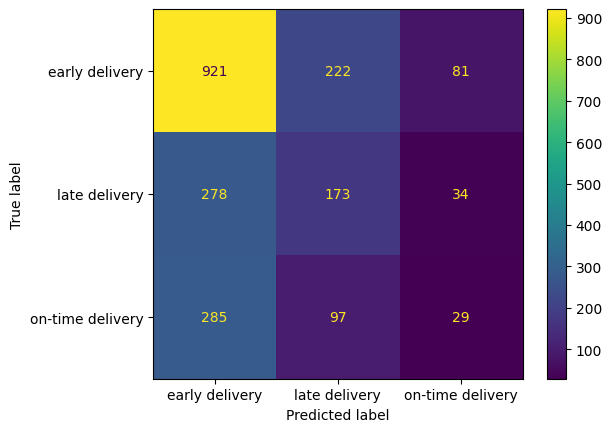

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
Lo_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=Lo_cm, display_labels=Logistic_model.classes_)
disp.plot()
plt.show()

#Logistic Regression without selecting features

In [ ]:
#training the model
LoR_model = LogisticRegression(max_iter=1000)
LoR_model.fit(x_train_processed,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#testing the model by making predictions
y_test_pred_LoR = LoR_model.predict(x_test_processed)

In [ ]:
result = pd.DataFrame({"Actual":y_test, "predicted_LoR":y_test_pred})
result.head()

Actual   predicted_LoR
14613  on-time delivery  early delivery
4408   on-time delivery  early delivery
4243      late delivery   late delivery
15398    early delivery  early delivery
14833    early delivery  early delivery

In [ ]:
result.loc[result["Actual"] != result["predicted_LoR"], :]

Actual     predicted_LoR
14613  on-time delivery    early delivery
4408   on-time delivery    early delivery
3318   on-time delivery    early delivery
5011      late delivery    early delivery
9929      late delivery    early delivery
...                 ...               ...
9183   on-time delivery    early delivery
1338   on-time delivery    early delivery
11664  on-time delivery     late delivery
9553      late delivery  on-time delivery
6668   on-time delivery    early delivery

[997 rows x 2 columns]

In [ ]:
LoR_accuracy_score = accuracy_score(y_test, y_test_pred)
LoR_accuracy_score

0.5297169811320754

In [ ]:
# Calculate the weighted F1 score
LoR_f1_score_weighted = f1_score(y_test, y_test_pred_LoR, average='weighted')

print(f"Weighted F1 Score (LoR): {LoR_f1_score_weighted}")

Weighted F1 Score (LoR): 0.4955642757525326


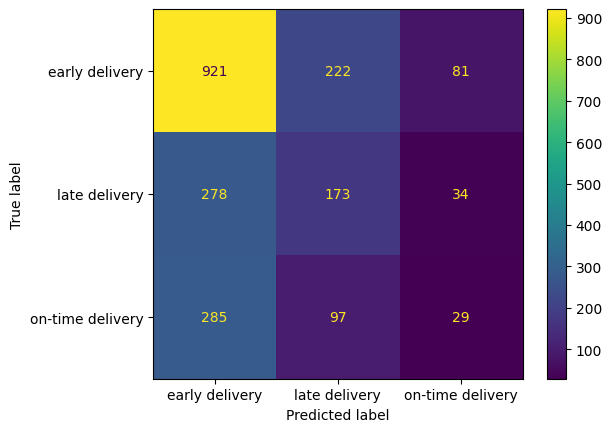

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
LoR_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=LoR_cm, display_labels=Logistic_model.classes_)
disp.plot()
plt.show()

#using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rfr = RandomForestClassifier(n_estimators=50, random_state=42)
rfr.fit(x_train_processed, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
#testing the model by making predictions
y_test_pred_rfr = rfr.predict(x_test_processed)

In [ ]:
result = pd.DataFrame({"Actual":y_test, "predicted_rfr":y_test_pred})
result.head()

Actual   predicted_rfr
14613  on-time delivery  early delivery
4408   on-time delivery  early delivery
4243      late delivery   late delivery
15398    early delivery  early delivery
14833    early delivery  early delivery

In [ ]:
result.loc[result["Actual"] != result["predicted_rfr"], :]

Actual     predicted_rfr
14613  on-time delivery    early delivery
4408   on-time delivery    early delivery
3318   on-time delivery    early delivery
5011      late delivery    early delivery
9929      late delivery    early delivery
...                 ...               ...
9183   on-time delivery    early delivery
1338   on-time delivery    early delivery
11664  on-time delivery     late delivery
9553      late delivery  on-time delivery
6668   on-time delivery    early delivery

[997 rows x 2 columns]

In [ ]:
rfr_accuracy_score = accuracy_score(y_test, y_test_pred)
rfr_accuracy_score

0.5297169811320754

In [ ]:
# Calculate the weighted F1 score
rfr_f1_score_weighted = f1_score(y_test, y_test_pred_rfr, average='weighted')

print(f"Weighted F1 Score (Rfr): {rfr_f1_score_weighted}")

Weighted F1 Score (Rfr): 0.4993187128023335


#using XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6, 7]
}


In [ ]:
# Train the untuned XGBoost model
from xgboost import XGBClassifier

# Initialize the XGBClassifier with the correct parameters for multi-class classification with labels 0, 1, 2
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(x_train_processed, y_train_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:15:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

Untuned Model - First 10 predictions (-1, 0, 1): [1 0 1 1 1 1 1 1 1 1]

Untuned Model - Accuracy Score: 0.585377358490566
Untuned Model - Weighted F1 Score: 0.5505002699152192


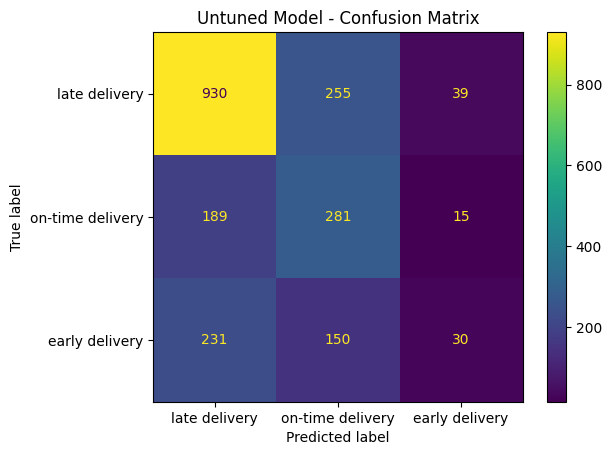

In [ ]:
# Evaluate the untuned model, including transforming predictions to -1, 0, 1
# Make predictions on the processed test data using the trained xgb_model
y_test_pred_xgb_numerical = xgb_model.predict(x_test_processed)

# Transform numerical predictions (0, 1, 2) to the desired (-1, 0, 1) format
y_test_pred_xgb_neg1_0_1 = y_test_pred_xgb_numerical - 1

# Display the first few predictions in the -1, 0, 1 format
print("Untuned Model - First 10 predictions (-1, 0, 1):", y_test_pred_xgb_neg1_0_1[:10])

# Decode the numerical predictions (0, 1, 2) back to original string labels for evaluation from the  OrdinalEncoder fitted earlier
y_test_pred_xgb_decoded = encoder.inverse_transform(y_test_pred_xgb_numerical.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

xgb_accuracy_score = accuracy_score(y_test, y_test_pred_xgb_decoded)
xgb_f1_score_weighted = f1_score(y_test, y_test_pred_xgb_decoded, average='weighted')
xgb_cm = confusion_matrix(y_test, y_test_pred_xgb_decoded)

print(f"\nUntuned Model - Accuracy Score: {xgb_accuracy_score}")
print(f"Untuned Model - Weighted F1 Score: {xgb_f1_score_weighted}")

# Display the confusion matrix
class_labels = encoder.categories_[0] # Get the original string labels
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=class_labels)
disp.plot()
plt.title("Untuned Model - Confusion Matrix")
plt.show()

#Hyperparameter tuninng of XGBoost

In [ ]:
# Hyperparameter tuning setup (param_dist)
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6, 7]
}

In [ ]:
# Initialize XGBoost for tuning (xgb_clf)
xgb_clf= XGBClassifier(tree_method="hist", objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, cv=3, n_jobs=-1, scoring="accuracy", verbose=1, random_state=42)

In [ ]:
# Run RandomizedSearchCV fit
random_search.fit(x_train_processed, y_train_encoded)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:30:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=3, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Display best params and score
print("Best params: ", random_search.best_params_)
print("Best cross_validation score: ", random_search.best_score_)

Best params:  {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best cross_validation score:  0.6216801007083405


In [ ]:
# Get best estimator and make predictions (y_test_pred_xgb_best)
best_model = random_search.best_estimator_
y_test_pred_xgb_best = best_model.predict(x_test_processed)

In [ ]:
# Transform best model predictions to -1, 0, 1 and display
# Transform the numerical predictions from the best model (0, 1, 2) to the desired (-1, 0, 1) format
y_test_pred_xgb_best_neg1_0_1 = y_test_pred_xgb_best - 1

# Display the first few predictions in the -1, 0, 1 format
print("Tuned Model - First 10 predictions (-1, 0, 1):", y_test_pred_xgb_best_neg1_0_1[:10])

Tuned Model - First 10 predictions (-1, 0, 1): [ 1  0  1  1  1  1  1 -1  1  1]


In [ ]:
# Evaluate best model (accuracy and F1)
from sklearn.metrics import accuracy_score, f1_score

# Decode the numerical predictions back to original string labels
y_test_pred_xgb_best_decoded = encoder.inverse_transform(y_test_pred_xgb_best.reshape(-1, 1)).ravel()

# Calculate the accuracy score
xgb_best_accuracy_score = accuracy_score(y_test, y_test_pred_xgb_best_decoded)
print(f"Tuned Model - Accuracy Score: {xgb_best_accuracy_score}")

# Calculate the weighted F1 score
xgb_best_f1_score_weighted = f1_score(y_test, y_test_pred_xgb_best_decoded, average='weighted')
print(f"Tuned Model - Weighted F1 Score: {xgb_best_f1_score_weighted}")

Tuned Model - Accuracy Score: 0.6141509433962264
Tuned Model - Weighted F1 Score: 0.5752938363825165


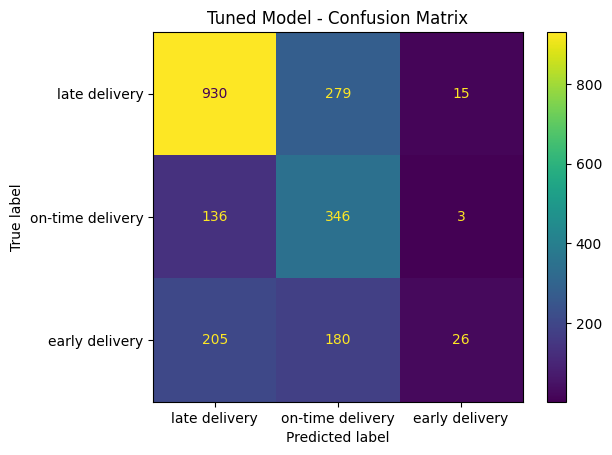

In [ ]:
# Display the confusion matrix for the best model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Calculate the confusion matrix using the true labels and the decoded predictions
xgb_best_cm = confusion_matrix(y_test, y_test_pred_xgb_best_decoded)

# Get the class labels in the correct order
class_labels = encoder.categories_[0]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_best_cm, display_labels=class_labels)
disp.plot()
plt.title("Tuned Model - Confusion Matrix")
plt.show()

#Conclusion


Data Cleaning:
The dataset was cleaned thoroughly. There were no missing values or duplicate records. Date fields were standardized to ensure consistency across time-based analyses.


Exploratory Data Analysis (EDA):
Descriptive analysis was conducted on both categorical and numerical variables. A correlation matrix was used to assess relationships between variables. Additionally, feature engineering was applied to derive new features, such as shipping duration, to enhance model performance.


Data Visualization:
Various visualization techniques were employed, including pie charts, box plots, count plots, histograms, and bar plots, to better understand the distribution and patterns in the data.


Preprocessing:
Numerical features were standardized, and categorical variables were encoded to prepare the dataset for machine learning modeling.


Key Insights from EDA:


Payment Methods:

Debit: 39.5%

Payment (unspecified): 24.7%

Transfer: 24.4%

Cash: 11.3%

Customer Location:

United States (EE UU): 60.7%

Puerto Rico: 39.3%

Customer Segment Distribution:

Consumer: 53.6%

Corporate: 29.6%

Home Office: 16.8%

Market Share by Region:

Europe: 29.4%

LATAM: 28.4%

Pacific Asia: 22.6%

USCA: 13.7%

Africa: 5.9% (lowest)

Delivery Status Distribution:

Early Delivery: 57.7%

Late Delivery: 22.8%

On-Time Delivery: 19.5%

Shipping Mode Usage:

Standard Class: 58.6%

Second Class: 21.1%

First Class: 15.4%

Same Day: 4.9% (lowest)

Order Status:

Pending: 32.6%

Completed: 34.0%

Under Payment Review: 0.4% (lowest item order quantity)

Item Quantity Insight:
First Class had the lowest quantity of items shipped.

Model Performance:

Several machine learning models were evaluated to predict delivery delay:

Logistic Regression (without feature selection):

Accuracy: 53%

F1 Score: 0.42

Logistic Regression (with feature selection):

Accuracy: 53%

F1 Score: 0.50

Random Forest Classifier:

Accuracy: 53%

F1 Score: 0.50

XGBoost (before tuning):

Accuracy: 58%

F1 Score: 0.55

XGBoost (after hyperparameter tuning):

Accuracy: 61%

F1 Score: 0.58

Model Prediction Results (Tuned XGBoost):

Correctly predicted late deliveries: 930

Correctly predicted on-time deliveries: 346

Correctly predicted early deliveries: 180



Among all evaluated models, the XGBoost model with hyperparameter tuning delivered the best performance in predicting delivery delays, achieving the highest accuracy and F1 score.

#potential business impact on delivery delays:

Reduced Customer Retention:

Customers are less likely to place repeat orders due to negative experiences.

Brand Reputation Erosion:

Service failures can lead to long-term damage to the company's public image.

Increased Order Cancellations and Refund Requests:

Delivery issues may result in higher rates of cancellations and refund claims.

Missed Revenue Opportunities:


Delays and inefficiencies can prevent the business from capitalizing on potential sales.

Decline in Profitability:


The combined effects of lost sales, cancellations, and damaged brand trust contribute to reduced overall profit margins.


#Recommendation

Factors identified as contributors to delivery delays include:

Discounts:
Promotional discounts can increase order volume, thereby affecting the speed of order fulfillment.

Order Quantity:
Larger orders typically require more time to process, pack, and dispatch, leading to potential delays.

Payment Type:
The mode of payment (cash, debit, or bank transfer) influences the speed of payment confirmation, which in turn affects the initiation of shipment.

Order Location (City, State, Country, Region, Market):
The geographical location of the customer impacts delivery time; orders within closer proximity to distribution centers are generally delivered faster.

Geospatial Coordinates (Longitude and Latitude):
Use of accurate geolocation data aids in identifying delivery cities and supports efficient routing.

Shipping Mode:
Delivery time varies based on the shipping class (e.g., same-day, first-class, second-class, standard). These were encoded to reflect their ordinal priority in the data.

Shipping Duration:
The designated shipping duration directly affects the estimated time of arrival for customer orders.

To mitigate these delays, the following actions are recommended:

Partner with local courier services to improve last-mile delivery speed.

Conduct capacity planning in advance of promotional discount periods to manage increased demand.

Send proactive delay notifications to customers to manage expectations and enhance satisfaction.

Process orders on the same day they are received, where operationally feasible.

Implement GPS route optimization for delivery drivers to enhance logistical efficiency.

Offer only those shipping mode options that align with achievable delivery timelines based on location and capacity.

Reduce instances of stockouts by maintaining adequate inventory levels.